# Rainfall Prediction Project - Week 1
## Time Series Exploration and Analysis

**Project Goal:** Predict rainfall in Australian cities  
**This Week's Tasks:**
1. Time series visualization (0.5p)
2. Time series decomposition (0.5p)
3. Autocorrelation analysis (0.5p)
4. Data partitioning plan (0.5p)

**Dataset:** Australian Weather Data from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

## 1. Load Dataset

Read the data from csv file

In [2]:
df = pd.read_csv('weatherAUS.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. Initial Data Exploration

In [3]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique locations: {df['Location'].nunique()}")
print(f"Locations: {sorted(df['Location'].unique())}")

DATASET INFORMATION
Dataset dimensions: 145460 rows × 23 columns
Date range: 2007-11-01 to 2017-06-25
Unique locations: 49
Locations: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [4]:
print("Missing Values Analysis:")
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100)
}).sort_values('Percentage', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Analysis:
               Missing_Count  Percentage
Sunshine               69835   48.009762
Evaporation            62790   43.166506
Cloud3pm               59358   40.807095
Cloud9am               55888   38.421559
Pressure9am            15065   10.356799
Pressure3pm            15028   10.331363
WindDir9am             10566    7.263853
WindGustDir            10326    7.098859
WindGustSpeed          10263    7.055548
Humidity3pm             4507    3.098446
WindDir3pm              4228    2.906641
Temp3pm                 3609    2.481094
RainTomorrow            3267    2.245978
Rainfall                3261    2.241853
RainToday               3261    2.241853
WindSpeed3pm            3062    2.105046
Humidity9am             2654    1.824557
WindSpeed9am            1767    1.214767
Temp9am                 1767    1.214767
MinTemp                 1485    1.020899
MaxTemp                 1261    0.866905


In [5]:
print("Target Variable Distribution:")
print(df['RainTomorrow'].value_counts())
print(f"\nRain percentage: {df['RainTomorrow'].value_counts(normalize=True)['Yes']*100:.2f}%")

Target Variable Distribution:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Rain percentage: 22.42%


## 3. Select City for Analysis

Choose a city to analyze. Options: Sydney, Melbourne, Brisbane, Perth, Adelaide, Albury, etc.

In [6]:
CITY = 'Sydney'

df_city = df[df['Location'] == CITY].copy()
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city = df_city.sort_values('Date').reset_index(drop=True)
df_city.set_index('Date', inplace=True)

print(f"City: {CITY}")
print(f"Data points: {len(df_city)}")
print(f"Date range: {df_city.index.min()} to {df_city.index.max()}")
print(f"Missing rainfall values: {df_city['Rainfall'].isnull().sum()}")

City: Sydney
Data points: 3344
Date range: 2008-02-01 00:00:00 to 2017-06-25 00:00:00
Missing rainfall values: 7


---
# TASK 1: Time Series Visualization (0.5p)
---

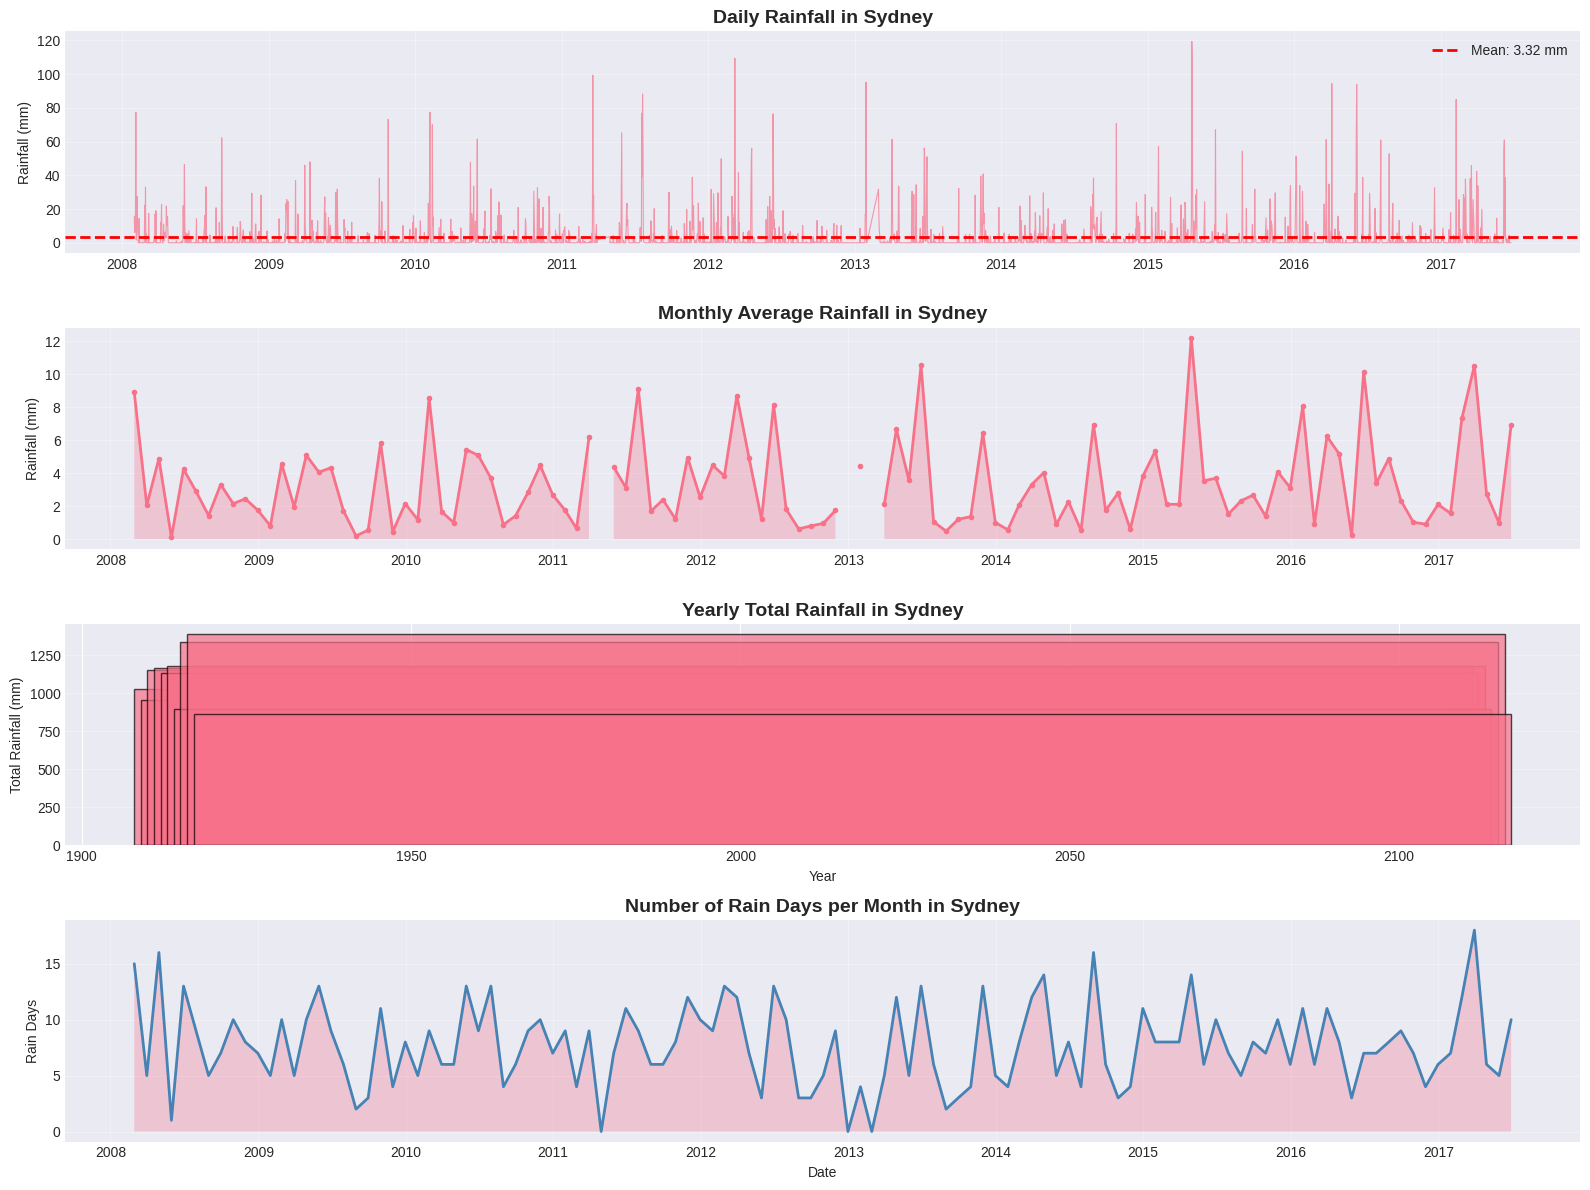

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

axes[0].plot(df_city.index, df_city['Rainfall'], linewidth=0.8, alpha=0.7)
axes[0].set_title(f'Daily Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df_city['Rainfall'].mean(), color='r', linestyle='--',
                label=f'Mean: {df_city["Rainfall"].mean():.2f} mm', linewidth=2)
axes[0].legend()

monthly_rainfall = df_city['Rainfall'].resample('M').mean()
axes[1].plot(monthly_rainfall.index, monthly_rainfall, linewidth=2, marker='o', markersize=3)
axes[1].set_title(f'Monthly Average Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(monthly_rainfall.index, monthly_rainfall, alpha=0.3)

yearly_rainfall = df_city['Rainfall'].resample('Y').sum()
axes[2].bar(yearly_rainfall.index.year, yearly_rainfall, width=200, alpha=0.7, edgecolor='black')
axes[2].set_title(f'Yearly Total Rainfall in {CITY}', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Total Rainfall (mm)')
axes[2].set_xlabel('Year')
axes[2].grid(True, alpha=0.3, axis='y')

df_city['RainDay'] = (df_city['Rainfall'] > 1).astype(int)
rain_days_monthly = df_city['RainDay'].resample('M').sum()
axes[3].plot(rain_days_monthly.index, rain_days_monthly, linewidth=2, color='steelblue')
axes[3].set_title(f'Number of Rain Days per Month in {CITY}', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Rain Days')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)
axes[3].fill_between(rain_days_monthly.index, rain_days_monthly, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_timeseries_overview.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
print("Rainfall Statistics:")
print(df_city['Rainfall'].describe())

Rainfall Statistics:
count    3337.000000
mean        3.324543
std         9.887184
min         0.000000
25%         0.000000
50%         0.000000
75%         1.400000
max       119.400000
Name: Rainfall, dtype: float64


### Seasonal Patterns Analysis

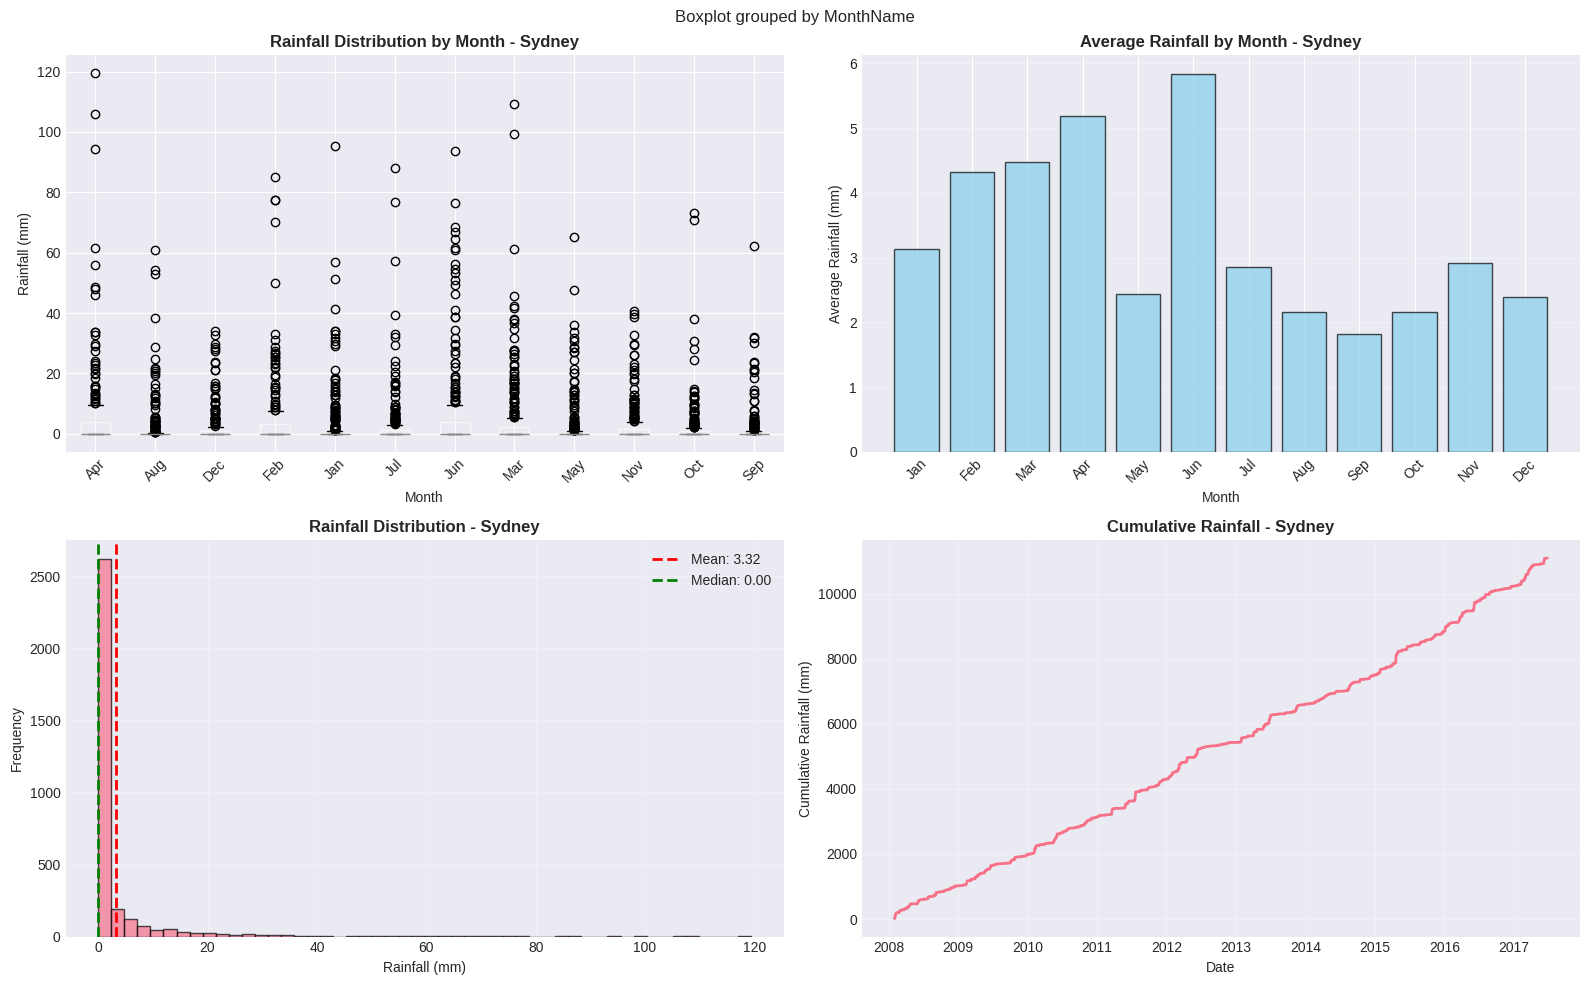

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df_city['Month'] = df_city.index.month
df_city['Year'] = df_city.index.year
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_city['MonthName'] = df_city.index.month.map(dict(enumerate(month_names, 1)))

df_city.boxplot(column='Rainfall', by='MonthName', ax=axes[0, 0])
axes[0, 0].set_title(f'Rainfall Distribution by Month - {CITY}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Rainfall (mm)')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

monthly_avg = df_city.groupby('Month')['Rainfall'].mean()
axes[0, 1].bar(range(1, 13), monthly_avg, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'Average Rainfall by Month - {CITY}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Rainfall (mm)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

axes[1, 0].hist(df_city['Rainfall'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'Rainfall Distribution - {CITY}', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rainfall (mm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df_city['Rainfall'].mean(), color='r', linestyle='--',
                   linewidth=2, label=f'Mean: {df_city["Rainfall"].mean():.2f}')
axes[1, 0].axvline(df_city['Rainfall'].median(), color='g', linestyle='--',
                   linewidth=2, label=f'Median: {df_city["Rainfall"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

df_city['CumulativeRainfall'] = df_city['Rainfall'].cumsum()
axes[1, 1].plot(df_city.index, df_city['CumulativeRainfall'], linewidth=2)
axes[1, 1].set_title(f'Cumulative Rainfall - {CITY}', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cumulative Rainfall (mm)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

---
# TASK 2: Time Series Decomposition (0.5p)
---

In [10]:
rainfall_monthly = df_city['Rainfall'].resample('M').mean().fillna(method='ffill')

print(f"Monthly data points: {len(rainfall_monthly)}")
print(f"Date range: {rainfall_monthly.index.min()} to {rainfall_monthly.index.max()}")

Monthly data points: 113
Date range: 2008-02-29 00:00:00 to 2017-06-30 00:00:00


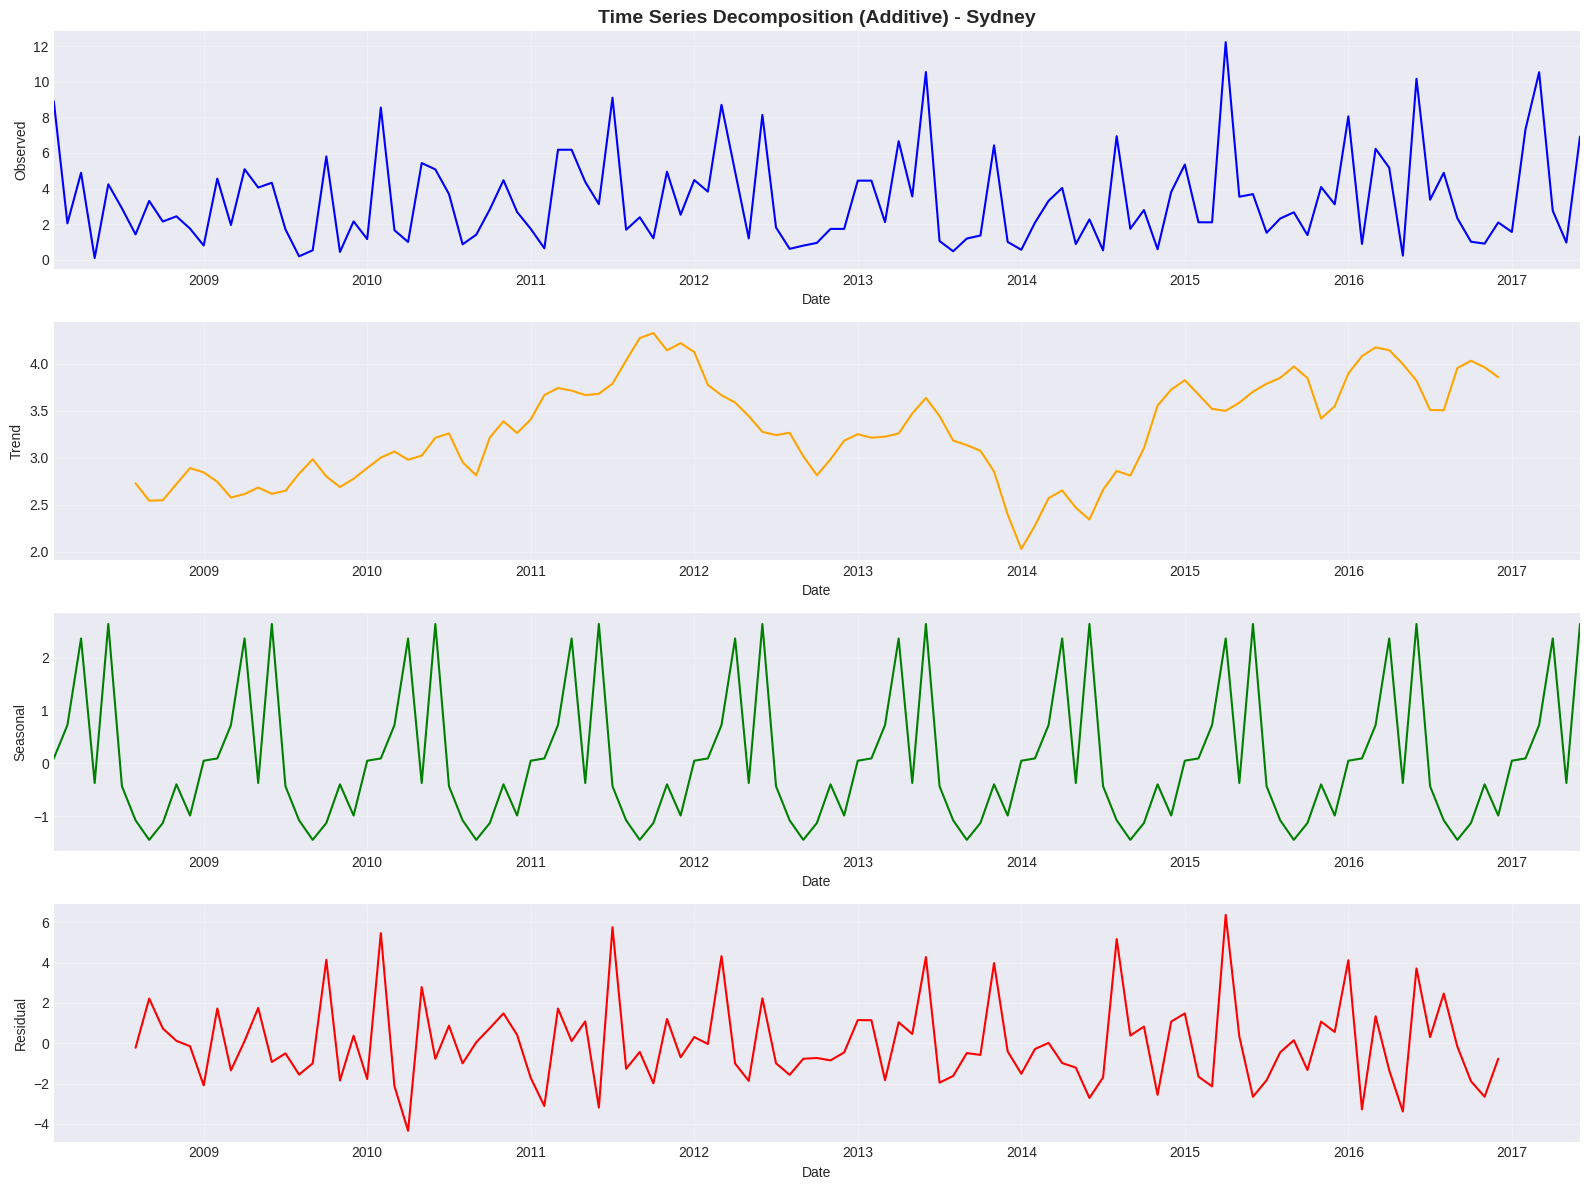

In [11]:
decomposition_add = seasonal_decompose(rainfall_monthly, model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition_add.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title(f'Time Series Decomposition (Additive) - {CITY}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition_add.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition_add.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition_add.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_decomposition_additive.png', dpi=300, bbox_inches='tight')
plt.show()

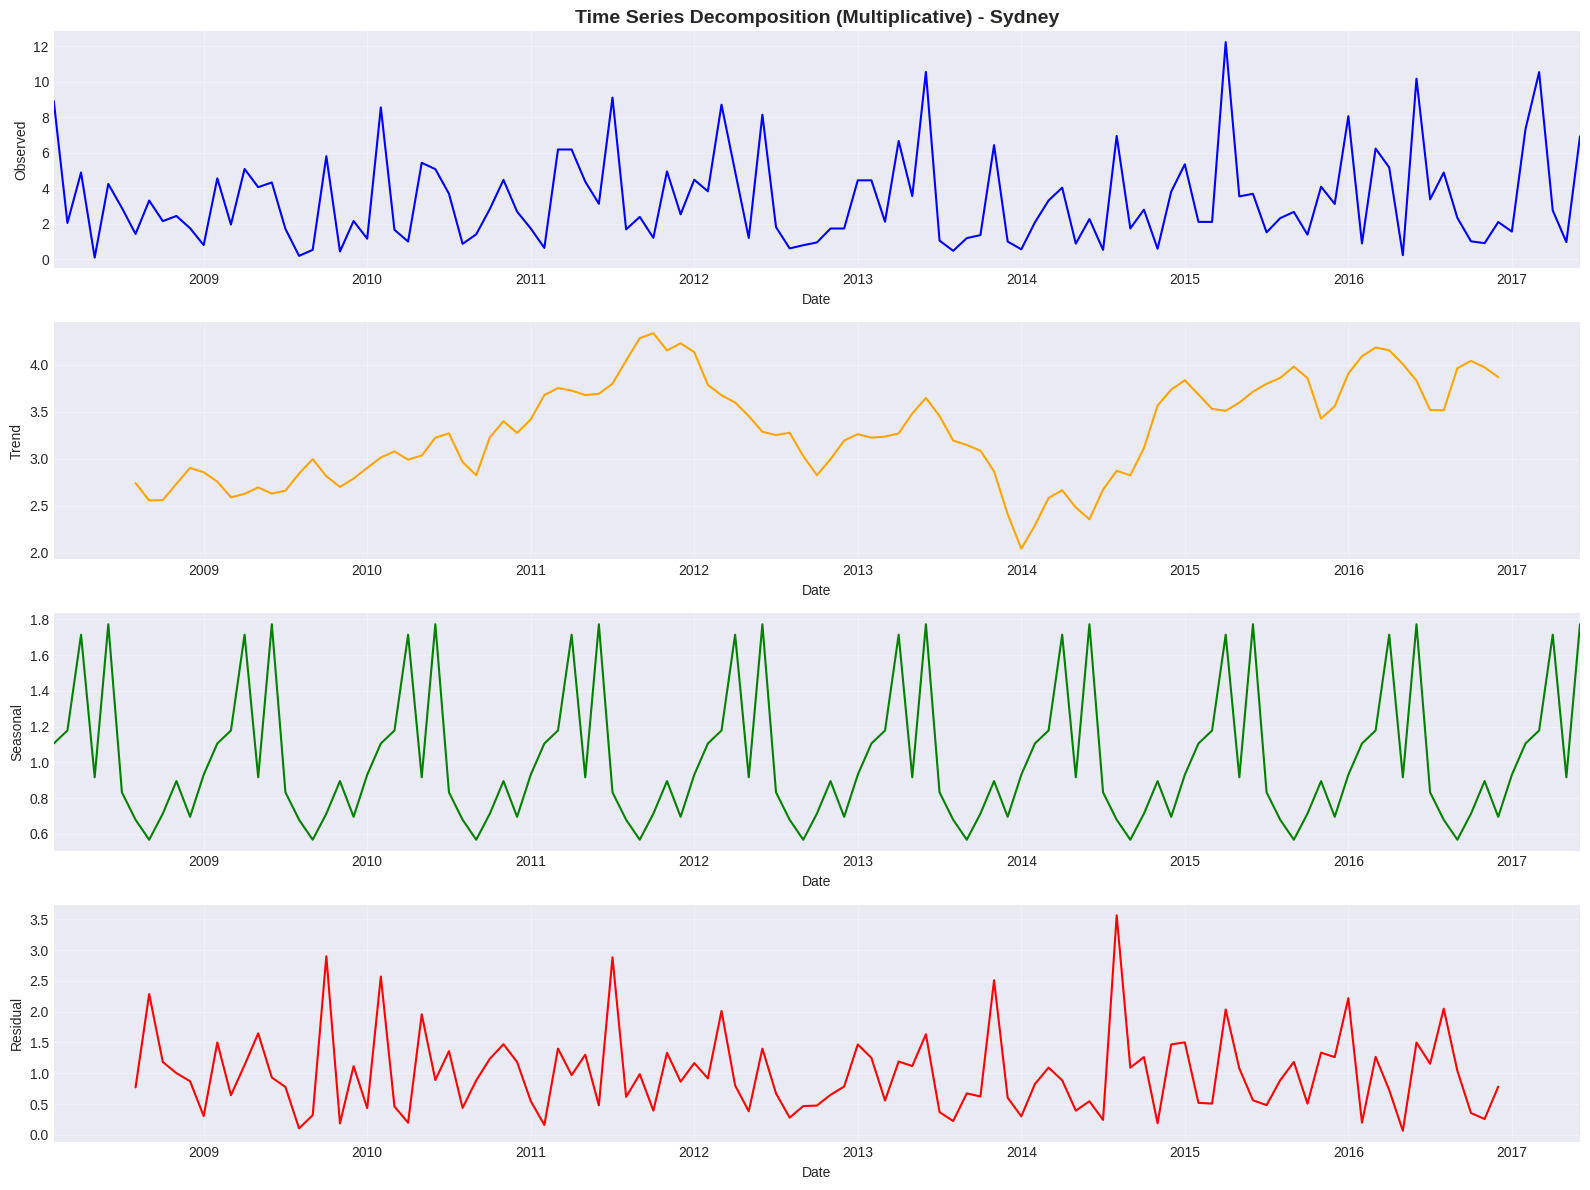

In [12]:
rainfall_monthly_mult = rainfall_monthly + 0.01
decomposition_mult = seasonal_decompose(rainfall_monthly_mult, model='multiplicative', period=12)

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition_mult.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title(f'Time Series Decomposition (Multiplicative) - {CITY}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition_mult.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition_mult.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition_mult.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_decomposition_multiplicative.png', dpi=300, bbox_inches='tight')
plt.show()

### Decomposition Analysis

In [13]:
print("DECOMPOSITION ANALYSIS (Additive Model)")
print("="*60)
print(f"\nTrend component:")
print(f"  Mean: {decomposition_add.trend.mean():.4f}")
print(f"  Std: {decomposition_add.trend.std():.4f}")
print(f"\nSeasonal component:")
print(f"  Mean: {decomposition_add.seasonal.mean():.4f}")
print(f"  Range: [{decomposition_add.seasonal.min():.4f}, {decomposition_add.seasonal.max():.4f}]")
print(f"\nResidual component:")
print(f"  Mean: {decomposition_add.resid.mean():.4f}")
print(f"  Std: {decomposition_add.resid.std():.4f}")

var_resid = np.var(decomposition_add.resid.dropna())
var_trend_resid = np.var(decomposition_add.trend.dropna() + decomposition_add.resid.dropna())
var_seasonal_resid = np.var(decomposition_add.seasonal.dropna() + decomposition_add.resid.dropna())

strength_trend = max(0, 1 - var_resid / var_trend_resid)
strength_seasonal = max(0, 1 - var_resid / var_seasonal_resid)

print(f"\nStrength of Trend: {strength_trend:.4f}")
print(f"Strength of Seasonality: {strength_seasonal:.4f}")

DECOMPOSITION ANALYSIS (Additive Model)

Trend component:
  Mean: 3.2951
  Std: 0.5315

Seasonal component:
  Mean: 0.0482
  Range: [-1.4519, 2.6391]

Residual component:
  Mean: -0.0093
  Std: 2.1222

Strength of Trend: 0.0575
Strength of Seasonality: 0.2602


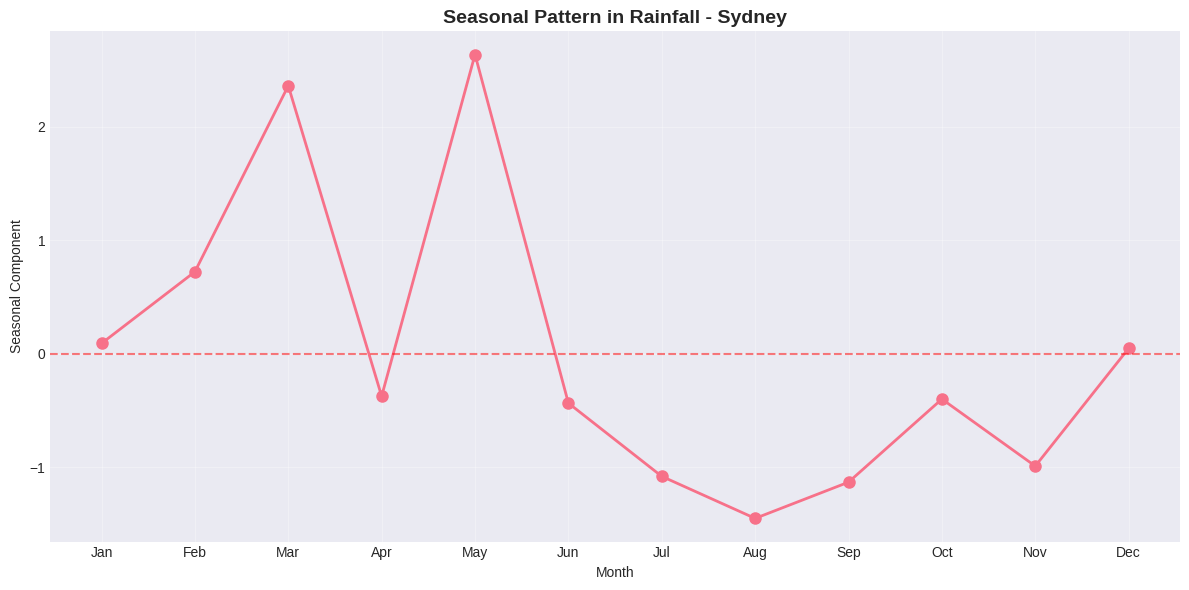

Seasonal Pattern by Month:
Jan:  0.0913
Feb:  0.7233
Mar:  2.3638
Apr: -0.3744
May:  2.6391
Jun: -0.4353
Jul: -1.0812
Aug: -1.4519
Sep: -1.1325
Oct: -0.3995
Nov: -0.9907
Dec:  0.0479


In [14]:
seasonal_pattern = decomposition_add.seasonal[:12]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), seasonal_pattern.values, marker='o', linewidth=2, markersize=8)
plt.title(f'Seasonal Pattern in Rainfall - {CITY}', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.xticks(range(1, 13), months)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f'{CITY}_seasonal_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print("Seasonal Pattern by Month:")
for i, month in enumerate(months):
    print(f"{month}: {seasonal_pattern.values[i]:>7.4f}")

---
# TASK 3: Autocorrelation Analysis (0.5p)
---

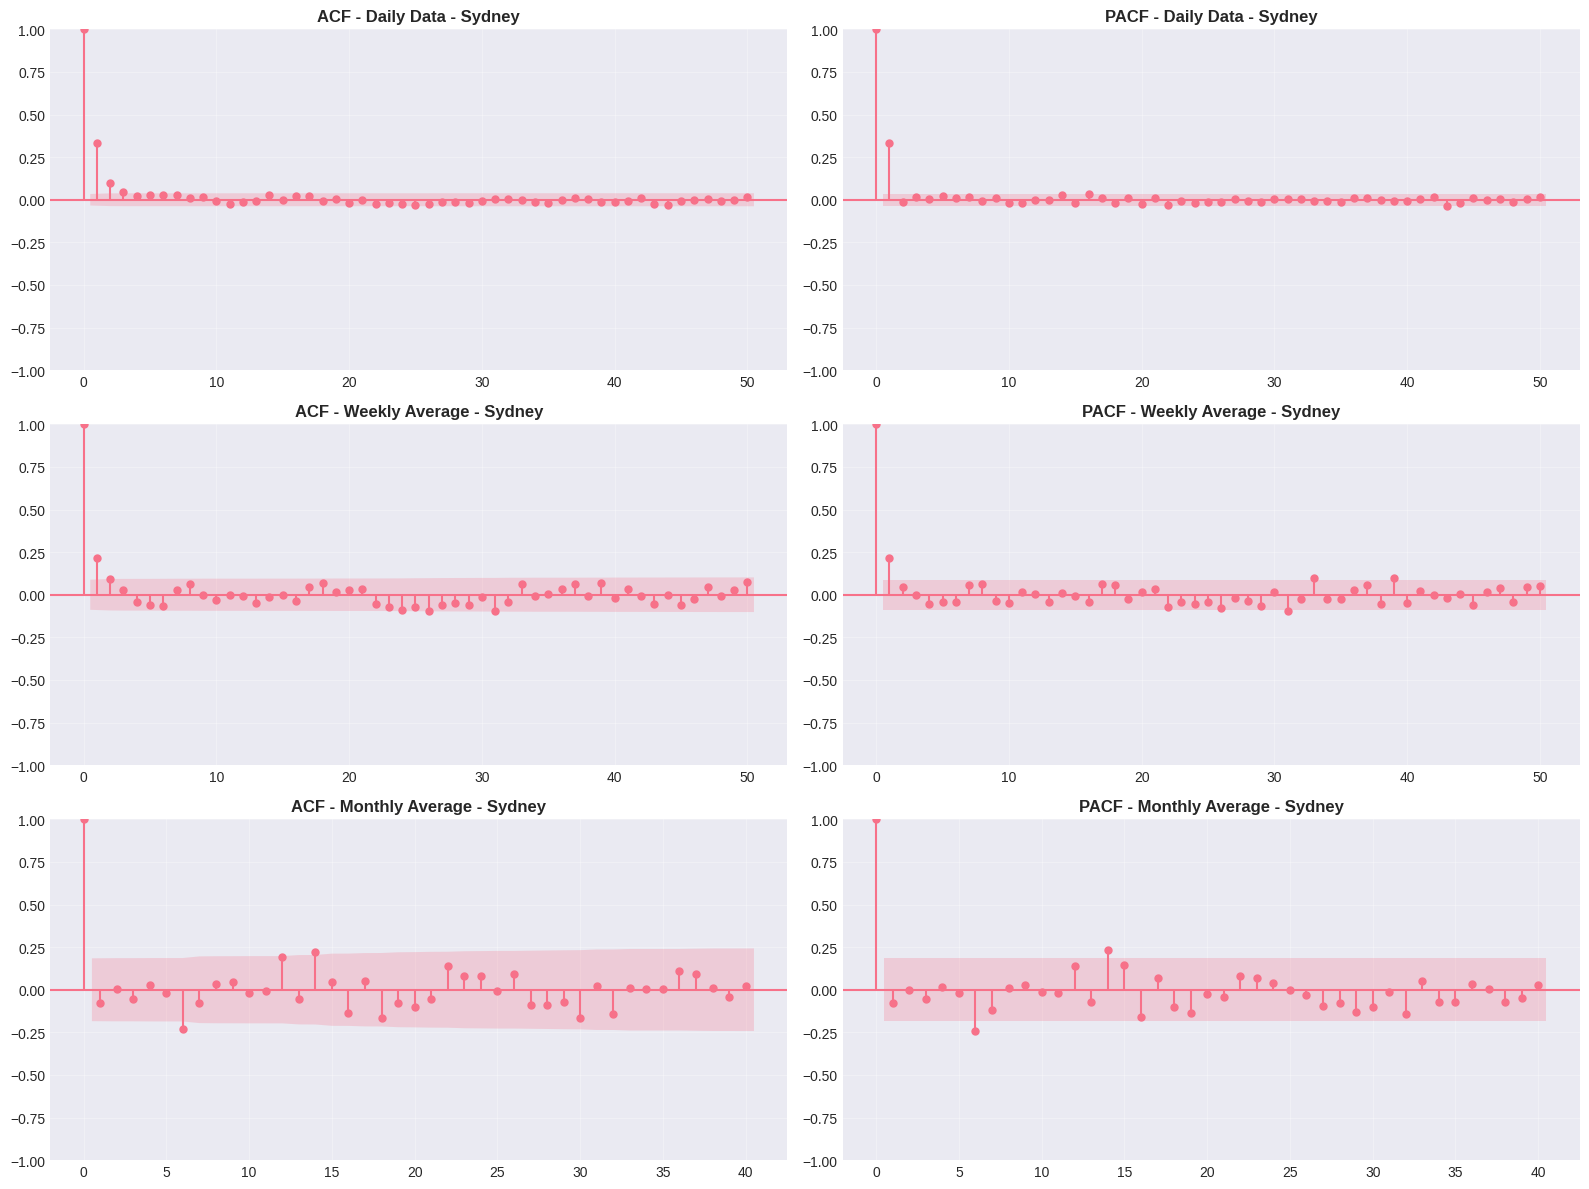

In [15]:
rainfall_daily = df_city['Rainfall'].fillna(method='ffill').fillna(method='bfill')

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

plot_acf(rainfall_daily.dropna(), lags=50, ax=axes[0, 0])
axes[0, 0].set_title(f'ACF - Daily Data - {CITY}', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_daily.dropna(), lags=50, ax=axes[0, 1])
axes[0, 1].set_title(f'PACF - Daily Data - {CITY}', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

rainfall_weekly = df_city['Rainfall'].resample('W').mean().fillna(method='ffill')
plot_acf(rainfall_weekly.dropna(), lags=50, ax=axes[1, 0])
axes[1, 0].set_title(f'ACF - Weekly Average - {CITY}', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_weekly.dropna(), lags=50, ax=axes[1, 1])
axes[1, 1].set_title(f'PACF - Weekly Average - {CITY}', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plot_acf(rainfall_monthly.dropna(), lags=40, ax=axes[2, 0])
axes[2, 0].set_title(f'ACF - Monthly Average - {CITY}', fontsize=12, fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)

plot_pacf(rainfall_monthly.dropna(), lags=40, ax=axes[2, 1])
axes[2, 1].set_title(f'PACF - Monthly Average - {CITY}', fontsize=12, fontweight='bold')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_autocorrelation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
acf_values = acf(rainfall_daily.dropna(), nlags=40)
pacf_values = pacf(rainfall_daily.dropna(), nlags=40)

print("AUTOCORRELATION ANALYSIS SUMMARY")
print("="*60)
print("\nFirst 10 ACF values:")
for i in range(10):
    print(f"Lag {i}: {acf_values[i]:.4f}")

significant_lags = np.where(np.abs(acf_values[1:]) > 0.1)[0] + 1
print(f"\nSignificant lags in ACF (|r| > 0.1):")
print(f"Lags: {significant_lags[:20]}")

print("\nFirst 10 PACF values:")
for i in range(10):
    print(f"Lag {i}: {pacf_values[i]:.4f}")

AUTOCORRELATION ANALYSIS SUMMARY

First 10 ACF values:
Lag 0: 1.0000
Lag 1: 0.3320
Lag 2: 0.1009
Lag 3: 0.0470
Lag 4: 0.0224
Lag 5: 0.0275
Lag 6: 0.0258
Lag 7: 0.0270
Lag 8: 0.0083
Lag 9: 0.0141

Significant lags in ACF (|r| > 0.1):
Lags: [1 2]

First 10 PACF values:
Lag 0: 1.0000
Lag 1: 0.3321
Lag 2: -0.0104
Lag 3: 0.0187
Lag 4: 0.0024
Lag 5: 0.0205
Lag 6: 0.0110
Lag 7: 0.0150
Lag 8: -0.0080
Lag 9: 0.0132


### Lag Plots

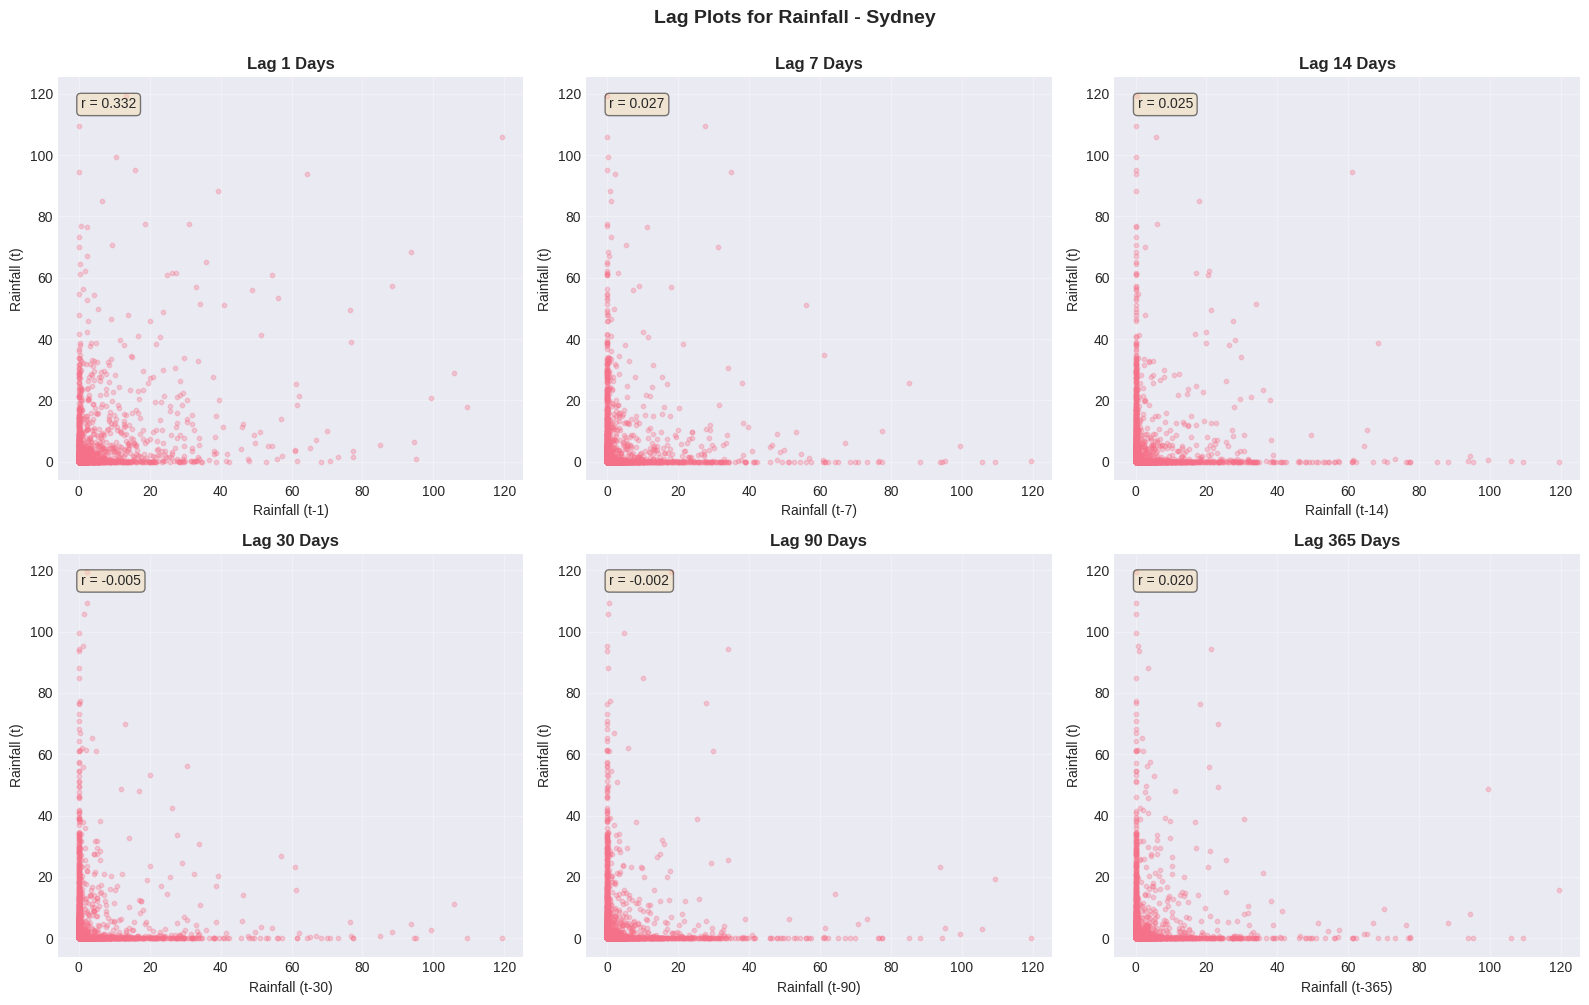

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
lags = [1, 7, 14, 30, 90, 365]

for idx, lag in enumerate(lags):
    row = idx // 3
    col = idx % 3

    data = pd.DataFrame({
        'rainfall': rainfall_daily,
        'rainfall_lag': rainfall_daily.shift(lag)
    }).dropna()

    axes[row, col].scatter(data['rainfall_lag'], data['rainfall'], alpha=0.3, s=10)
    axes[row, col].set_xlabel(f'Rainfall (t-{lag})')
    axes[row, col].set_ylabel('Rainfall (t)')
    axes[row, col].set_title(f'Lag {lag} Days', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

    corr = data.corr().iloc[0, 1]
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}',
                        transform=axes[row, col].transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle(f'Lag Plots for Rainfall - {CITY}', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(f'{CITY}_lag_plots.png', dpi=300, bbox_inches='tight')
plt.show()

---
# TASK 4: Data Partitioning Plan (0.5p)
---

In [18]:
total_days = len(df_city)
total_months = len(rainfall_monthly)

print("DATA OVERVIEW:")
print(f"Total data points (daily): {total_days}")
print(f"Total data points (monthly): {total_months}")
print(f"Date range: {df_city.index.min()} to {df_city.index.max()}")
print(f"Total years: {(df_city.index.max() - df_city.index.min()).days / 365.25:.2f}")

DATA OVERVIEW:
Total data points (daily): 3344
Total data points (monthly): 113
Date range: 2008-02-01 00:00:00 to 2017-06-25 00:00:00
Total years: 9.40


In [19]:
train_end_idx = int(0.70 * total_days)
val_end_idx = int(0.85 * total_days)

train_data = df_city.iloc[:train_end_idx]
val_data = df_city.iloc[train_end_idx:val_end_idx]
test_data = df_city.iloc[val_end_idx:]

print("TEMPORAL SPLIT (70% Train / 15% Validation / 15% Test):")
print(f"Training set:   {train_data.index.min()} to {train_data.index.max()} ({len(train_data)} days)")
print(f"Validation set: {val_data.index.min()} to {val_data.index.max()} ({len(val_data)} days)")
print(f"Test set:       {test_data.index.min()} to {test_data.index.max()} ({len(test_data)} days)")

TEMPORAL SPLIT (70% Train / 15% Validation / 15% Test):
Training set:   2008-02-01 00:00:00 to 2014-09-25 00:00:00 (2340 days)
Validation set: 2014-09-26 00:00:00 to 2016-02-09 00:00:00 (502 days)
Test set:       2016-02-10 00:00:00 to 2017-06-25 00:00:00 (502 days)


In [20]:
years = df_city.index.year.unique()
n_years = len(years)
train_years = int(0.70 * n_years)
val_years = int(0.85 * n_years)

train_year_end = sorted(years)[train_years - 1]
val_year_end = sorted(years)[val_years - 1]

print("YEAR-BASED SPLIT:")
print(f"Training years:   {years.min()} - {train_year_end}")
print(f"Validation years: {train_year_end + 1} - {val_year_end}")
print(f"Test years:       {val_year_end + 1} - {years.max()}")

YEAR-BASED SPLIT:
Training years:   2008 - 2014
Validation years: 2015 - 2015
Test years:       2016 - 2017


In [21]:
window_size = 365
horizon = 30
n_splits = 5

print("ROLLING WINDOW CROSS-VALIDATION:")
print(f"Window size: {window_size} days (1 year)")
print(f"Forecast horizon: {horizon} days")
print(f"Number of splits: {n_splits}")

ROLLING WINDOW CROSS-VALIDATION:
Window size: 365 days (1 year)
Forecast horizon: 30 days
Number of splits: 5


### Partitioning Visualization

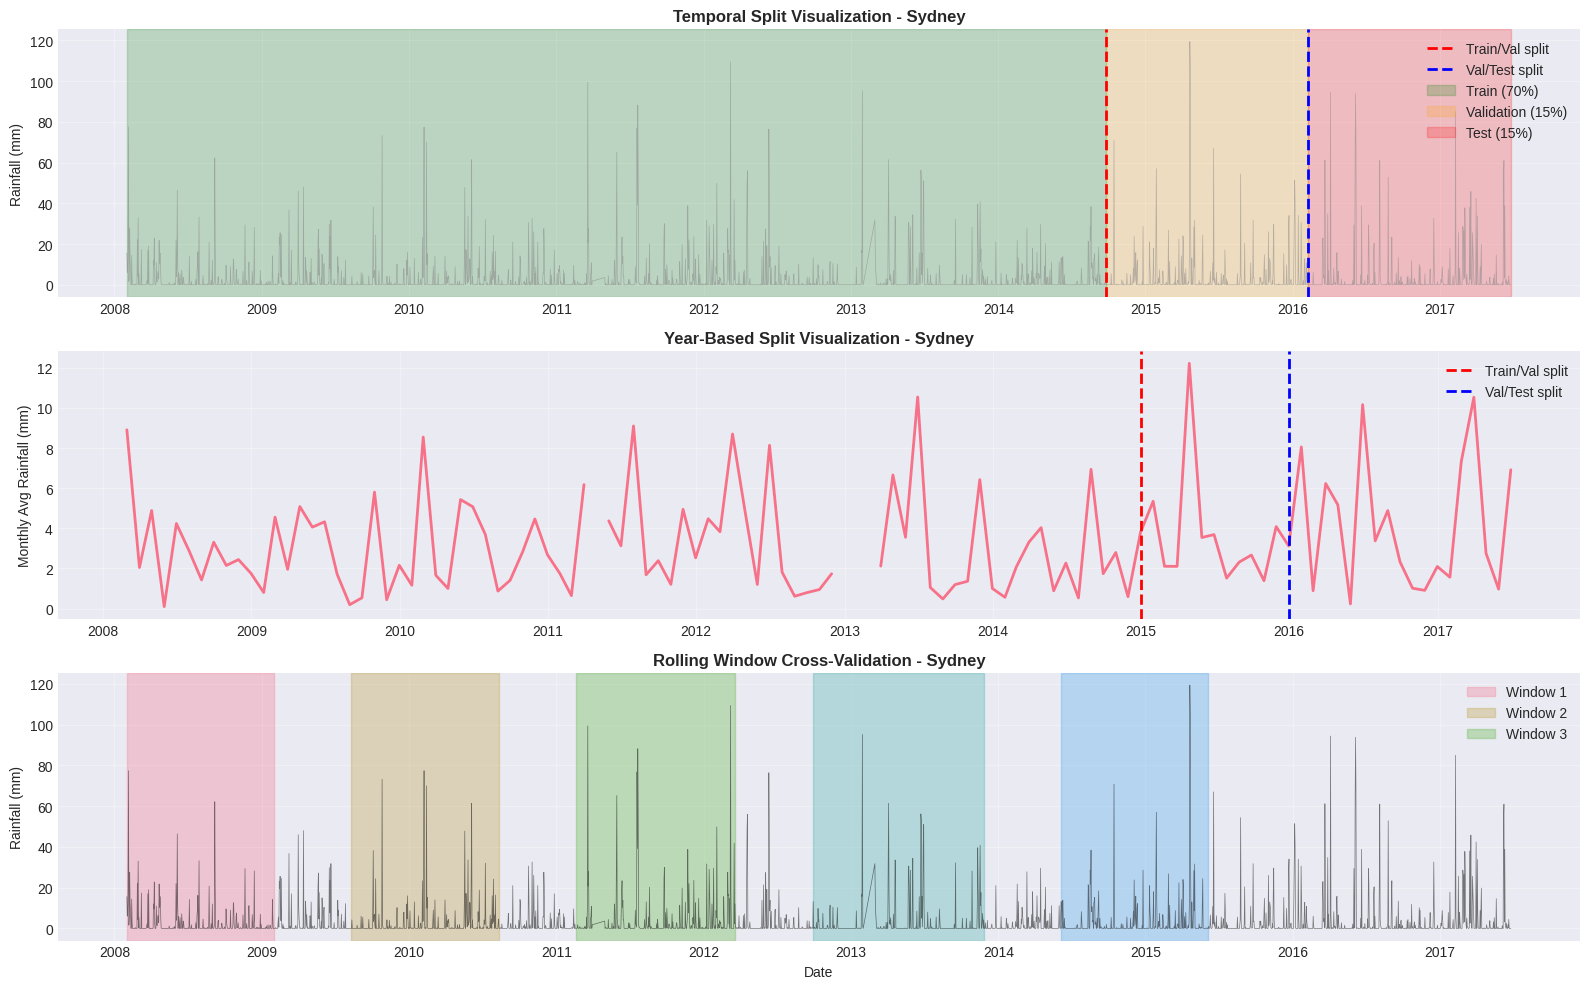

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

axes[0].plot(df_city.index, df_city['Rainfall'], linewidth=0.5, alpha=0.5, color='gray')
axes[0].axvline(x=train_data.index.max(), color='red', linestyle='--', linewidth=2, label='Train/Val split')
axes[0].axvline(x=val_data.index.max(), color='blue', linestyle='--', linewidth=2, label='Val/Test split')
axes[0].axvspan(df_city.index.min(), train_data.index.max(), alpha=0.2, color='green', label='Train (70%)')
axes[0].axvspan(train_data.index.max(), val_data.index.max(), alpha=0.2, color='orange', label='Validation (15%)')
axes[0].axvspan(val_data.index.max(), df_city.index.max(), alpha=0.2, color='red', label='Test (15%)')
axes[0].set_title(f'Temporal Split Visualization - {CITY}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

monthly_data = df_city['Rainfall'].resample('M').mean()
axes[1].plot(monthly_data.index, monthly_data, linewidth=2)
axes[1].axvline(x=pd.Timestamp(f'{train_year_end}-12-31'), color='red', linestyle='--',
                linewidth=2, label='Train/Val split')
axes[1].axvline(x=pd.Timestamp(f'{val_year_end}-12-31'), color='blue', linestyle='--',
                linewidth=2, label='Val/Test split')
axes[1].set_title(f'Year-Based Split Visualization - {CITY}', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Monthly Avg Rainfall (mm)')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

rainfall_for_rolling = df_city['Rainfall'].fillna(0)
step_size = len(rainfall_for_rolling) // (n_splits + 1)

for i in range(n_splits):
    start_idx = i * step_size
    train_end_idx = start_idx + window_size
    test_end_idx = min(train_end_idx + horizon, len(rainfall_for_rolling))

    if train_end_idx < len(rainfall_for_rolling):
        train_start = df_city.index[start_idx]
        train_end = df_city.index[min(train_end_idx, len(df_city)-1)]
        axes[2].axvspan(train_start, train_end, alpha=0.3, color=f'C{i}',
                        label=f'Window {i+1}' if i < 3 else '')

axes[2].plot(df_city.index, rainfall_for_rolling, linewidth=0.5, alpha=0.5, color='black')
axes[2].set_title(f'Rolling Window Cross-Validation - {CITY}', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Date')
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{CITY}_partitioning_strategy.png', dpi=300, bbox_inches='tight')
plt.show()

### Recommended Partitioning Approach

**Method:** Temporal Split

**Rationale:**
1. Preserves temporal ordering (critical for time series)
2. Prevents data leakage from future to past
3. Simulates real-world forecasting scenario

**Implementation:**
- Training Set (70%): Build and train models
- Validation Set (15%): Hyperparameter tuning, model selection
- Test Set (15%): Final performance evaluation

**Additional Validation:**
- Use rolling window cross-validation for robust evaluation
- Ensures model performs well across different time periods
- Helps detect overfitting to specific time periods

In [23]:
train_data.to_csv(f'{CITY}_train_data.csv')
val_data.to_csv(f'{CITY}_val_data.csv')
test_data.to_csv(f'{CITY}_test_data.csv')

print(" Data saved successfully!")
print(f"\nFiles created:")
print(f"  - {CITY}_train_data.csv")
print(f"  - {CITY}_val_data.csv")
print(f"  - {CITY}_test_data.csv")

 Data saved successfully!

Files created:
  - Sydney_train_data.csv
  - Sydney_val_data.csv
  - Sydney_test_data.csv


# Week 3

###  Import Additional Libraries

**Purpose**: Load ML and time-series libraries for Week 3 tasks

**What we're importing**:
- Scikit-learn: Scaling, Logistic Regression
- Statsmodels: ARIMA model (Task 6)
- Metrics: Evaluation tools

**Requirement**: Task 6 (Baseline Models - 0.5p)

**Expected**:  Success message

In [24]:
# Additional imports for Week 3
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import cross_val_score

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings('ignore')

print("Week 3 libraries imported successfully!")

Week 3 libraries imported successfully!


## Apply Complete Preprocessing Pipeline

### Data Preprocessing

**Purpose**: Clean data by handling missing values

**Steps**:
1. Select 13 features (based on quality checks: <10% missing)
2. Interpolate continuous vars (limit=3 days)
3. Forward-fill categorical vars (RainToday/Tomorrow)
4. Drop remaining NaN (~11 rows)
5. Encode Yes/No → 1/0

**Requirements**: Task 3 (Missing Values - 0.3p)

**Expected Output**:
- Final dataset: ~3,333 observations (99.67% retention)
- All features cleaned and encoded

**Why**: Linear interpolation respects gradual weather changes; 3-day limit avoids unrealistic estimates

In [25]:
print("="*80)
print("WEEK 3: DATA PREPROCESSING PIPELINE")
print("="*80)

# Step 1: Select features (based on quality analysis)
selected_features = [
    'Rainfall', 'RainTomorrow', 'RainToday',
    'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
    'Pressure9am', 'Pressure3pm',
    'Humidity9am', 'Humidity3pm',
    'WindSpeed9am', 'WindSpeed3pm'
]

# Create working dataset
df_processed = df_city[selected_features].copy()

print(f"\n Initial Dataset:")
print(f"   Rows: {len(df_processed)}")
print(f"   Features: {len(selected_features)}")
print(f"   Date range: {df_processed.index.min().date()} to {df_processed.index.max().date()}")

# Step 2: Impute missing values
print(f"\n Applying Imputation Strategy:")

# Continuous variables - Linear interpolation (limit=3 days)
continuous_vars = ['Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
                   'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm',
                   'WindSpeed9am', 'WindSpeed3pm']

for col in continuous_vars:
    before = df_processed[col].isnull().sum()
    df_processed[col] = df_processed[col].interpolate(method='linear', limit=3)
    after = df_processed[col].isnull().sum()
    if before > 0:
        print(f"   {col:15s}: {before:3d} → {after:3d} missing")

# Categorical variables - Forward fill
categorical_vars = ['RainToday', 'RainTomorrow']
for col in categorical_vars:
    before = df_processed[col].isnull().sum()
    df_processed[col] = df_processed[col].fillna(method='ffill')
    after = df_processed[col].isnull().sum()
    if before > 0:
        print(f"   {col:15s}: {before:3d} → {after:3d} missing")

# Step 3: Drop remaining NaN rows
before_drop = len(df_processed)
df_processed = df_processed.dropna()
after_drop = len(df_processed)

print(f"\n Final Cleaning:")
print(f"   Rows dropped: {before_drop - after_drop} ({(before_drop-after_drop)/before_drop*100:.2f}%)")
print(f"   Final dataset: {len(df_processed)} observations")

# Step 4: Convert categorical variables to binary
print(f"\n Encoding Categorical Variables:")
df_processed['RainToday'] = (df_processed['RainToday'] == 'Yes').astype(int)
df_processed['RainTomorrow'] = (df_processed['RainTomorrow'] == 'Yes').astype(int)
print(f"   RainToday: Yes/No → 1/0")
print(f"   RainTomorrow: Yes/No → 1/0")

print(f"\n Preprocessing complete!")
print(f"   Clean observations: {len(df_processed)}")
print(f"   Features: {df_processed.shape[1]}")

WEEK 3: DATA PREPROCESSING PIPELINE

 Initial Dataset:
   Rows: 3344
   Features: 13
   Date range: 2008-02-01 to 2017-06-25

 Applying Imputation Strategy:
   Rainfall       :   7 →   0 missing
   MinTemp        :   4 →   0 missing
   MaxTemp        :   2 →   0 missing
   Temp9am        :   5 →   0 missing
   Temp3pm        :   4 →   0 missing
   Pressure9am    :  21 →   1 missing
   Pressure3pm    :  19 →   3 missing
   Humidity9am    :  15 →   1 missing
   Humidity3pm    :  13 →   0 missing
   WindSpeed9am   :  26 →   7 missing
   WindSpeed3pm   :  25 →   5 missing
   RainToday      :   7 →   0 missing
   RainTomorrow   :   7 →   0 missing

 Final Cleaning:
   Rows dropped: 11 (0.33%)
   Final dataset: 3333 observations

 Encoding Categorical Variables:
   RainToday: Yes/No → 1/0
   RainTomorrow: Yes/No → 1/0

 Preprocessing complete!
   Clean observations: 3333
   Features: 13


## Feature Engineering - Temporal Features

**Purpose**: Create calendar-based features for seasonality

**Features Created**:
- Basic: Year, Month, Quarter, DayOfYear, DayOfWeek
- Cyclical: month_sin/cos, dayofyear_sin/cos

**Why Cyclical Encoding**:
December (12) and January (1) are adjacent but numerically far → sin/cos preserves circular relationship

**Requirements**:
- Task 5 (Literature - 0.5p): Implements "explicit seasonal features for <10 years data"
- Week 2 finding: Seasonal strength = 0.26 (moderate) → benefits from explicit features

**Expected**: 8 new features, values in [-1, 1] for cyclical encodings

In [26]:
print("="*80)
print("FEATURE ENGINEERING: TEMPORAL FEATURES")
print("="*80)

# Add temporal features
df_processed['Year'] = df_processed.index.year
df_processed['Month'] = df_processed.index.month
df_processed['DayOfYear'] = df_processed.index.dayofyear
df_processed['DayOfWeek'] = df_processed.index.dayofweek
df_processed['Quarter'] = df_processed.index.quarter
df_processed['WeekOfYear'] = df_processed.index.isocalendar().week

# Cyclical encoding for month (sine/cosine transformation)
df_processed['Month_sin'] = np.sin(2 * np.pi * df_processed['Month'] / 12)
df_processed['Month_cos'] = np.cos(2 * np.pi * df_processed['Month'] / 12)

# Cyclical encoding for day of year
df_processed['DayOfYear_sin'] = np.sin(2 * np.pi * df_processed['DayOfYear'] / 365)
df_processed['DayOfYear_cos'] = np.cos(2 * np.pi * df_processed['DayOfYear'] / 365)

print(f"\n Temporal Features Created:")
print(f"   - Year, Month, Quarter, Week")
print(f"   - DayOfYear, DayOfWeek")
print(f"   - Cyclical encodings (sin/cos) for seasonality")

# Display sample
print(f"\nSample temporal features:")
print(df_processed[['Year', 'Month', 'DayOfYear', 'Month_sin', 'Month_cos']].head())

FEATURE ENGINEERING: TEMPORAL FEATURES

 Temporal Features Created:
   - Year, Month, Quarter, Week
   - DayOfYear, DayOfWeek
   - Cyclical encodings (sin/cos) for seasonality

Sample temporal features:
            Year  Month  DayOfYear  Month_sin  Month_cos
Date                                                    
2008-02-01  2008      2         32   0.866025        0.5
2008-02-02  2008      2         33   0.866025        0.5
2008-02-03  2008      2         34   0.866025        0.5
2008-02-04  2008      2         35   0.866025        0.5
2008-02-05  2008      2         36   0.866025        0.5


## Feature Engineering - Lag Features

**Purpose**: Capture temporal dependencies from Week 2 ACF analysis

**Features Created**:
- Lags [1,2,3,7] for: Rainfall, MinTemp, MaxTemp, Pressure9am, Humidity9am
- Rolling mean/std [3,7,14 days] for Rainfall

**Why These Lags**: Week 2 ACF showed lag-1 = 0.332 (significant)

**Requirements**:
- Task 6 (Baseline - 0.5p): Lag-1 enables AR(1) comparison
- Task 5 (Literature - 0.5p): Sliding window concept

**Expected**:
- 20 lag features + 6 rolling stats
- Data loss: ~14 rows (0.4%)
- Final: ~3,320 observations

In [28]:
print("="*80)
print("FEATURE ENGINEERING: LAG FEATURES")
print("="*80)

# Create lag features for key variables

lag_periods = [1, 2, 3, 7]  # 1-day, 2-day, 3-day, 1-week

lag_variables = ['Rainfall', 'MinTemp', 'MaxTemp', 'Pressure9am', 'Humidity9am']

print(f"\nCreating lag features for {len(lag_variables)} variables:")
print(f"Lag periods: {lag_periods}")

for var in lag_variables:
    for lag in lag_periods:
        col_name = f'{var}_lag{lag}'
        df_processed[col_name] = df_processed[var].shift(lag)
        print(f" {col_name}")

# Create rolling statistics (moving averages)
rolling_windows = [3, 7, 14]  # 3-day, weekly, bi-weekly

print(f"\n Creating rolling statistics:")
for window in rolling_windows:
    df_processed[f'Rainfall_rolling_mean_{window}d'] = df_processed['Rainfall'].rolling(window=window).mean()
    df_processed[f'Rainfall_rolling_std_{window}d'] = df_processed['Rainfall'].rolling(window=window).std()
    print(f" {window}-day rolling mean & std")

# Drop rows with NaN from lag features
before_lag_drop = len(df_processed)
df_processed = df_processed.dropna()
after_lag_drop = len(df_processed)

print(f"\n Rows dropped due to lag features: {before_lag_drop - after_lag_drop}")
print(f"   Final dataset size: {len(df_processed)} observations")

print(f"\n Total features after engineering: {df_processed.shape[1]}")

FEATURE ENGINEERING: LAG FEATURES

Creating lag features for 5 variables:
Lag periods: [1, 2, 3, 7]
 Rainfall_lag1
 Rainfall_lag2
 Rainfall_lag3
 Rainfall_lag7
 MinTemp_lag1
 MinTemp_lag2
 MinTemp_lag3
 MinTemp_lag7
 MaxTemp_lag1
 MaxTemp_lag2
 MaxTemp_lag3
 MaxTemp_lag7
 Pressure9am_lag1
 Pressure9am_lag2
 Pressure9am_lag3
 Pressure9am_lag7
 Humidity9am_lag1
 Humidity9am_lag2
 Humidity9am_lag3
 Humidity9am_lag7

 Creating rolling statistics:
 3-day rolling mean & std
 7-day rolling mean & std
 14-day rolling mean & std

 Rows dropped due to lag features: 13
   Final dataset size: 3307 observations

 Total features after engineering: 49


## Create Additional Derived Features

**Purpose**: Create meteorological features based on physics

**Features**:
- Temperature: TempRange, Temp_Afternoon_Change
- Pressure: Pressure_Change (falling pressure → rain)
- Humidity: Humidity_Change, Humidity_Avg
- Wind: WindSpeed_Change, WindSpeed_Avg
- Rain history: RainYesterday, Rain_Last3Days, Rain_Last7Days

**Why**: Pressure tendency is a primary forecasting tool; helps simple models capture nonlinear patterns

**Expected**:
- 10 derived features
- Total features: ~57
- Data loss: ~7 rows (from rolling)

In [29]:
print("="*80)
print("FEATURE ENGINEERING: DERIVED FEATURES")
print("="*80)

# Temperature-based features
df_processed['TempRange'] = df_processed['MaxTemp'] - df_processed['MinTemp']
df_processed['Temp_Afternoon_Change'] = df_processed['Temp3pm'] - df_processed['Temp9am']

# Pressure-based features
df_processed['Pressure_Change'] = df_processed['Pressure3pm'] - df_processed['Pressure9am']

# Humidity-based features
df_processed['Humidity_Change'] = df_processed['Humidity3pm'] - df_processed['Humidity9am']
df_processed['Humidity_Avg'] = (df_processed['Humidity9am'] + df_processed['Humidity3pm']) / 2

# Wind-based features
df_processed['WindSpeed_Change'] = df_processed['WindSpeed3pm'] - df_processed['WindSpeed9am']
df_processed['WindSpeed_Avg'] = (df_processed['WindSpeed9am'] + df_processed['WindSpeed3pm']) / 2

# Rain-related features
df_processed['RainYesterday'] = df_processed['RainToday'].shift(1)
df_processed['Rain_Last3Days'] = df_processed['RainToday'].rolling(window=3).sum()
df_processed['Rain_Last7Days'] = df_processed['RainToday'].rolling(window=7).sum()

# Drop NaN from new features
df_processed = df_processed.dropna()

print(f"\n Derived Features Created:")
print(f"   - Temperature range & changes")
print(f"   - Pressure changes")
print(f"   - Humidity changes & averages")
print(f"   - Wind speed changes & averages")
print(f"   - Rain history (1, 3, 7 days)")

print(f"\n Final Feature Count: {df_processed.shape[1]} features")
print(f"   Final Observations: {len(df_processed)}")

# Display feature summary
print(f"\n Feature Categories:")
original_features = len(selected_features)
temporal_features = 8  # Year, Month, etc.
lag_features = len(lag_variables) * len(lag_periods)
rolling_features = len(rolling_windows) * 2
derived_features = 10

print(f"   Original weather variables: {original_features}")
print(f"   Temporal features: {temporal_features}")
print(f"   Lag features: {lag_features}")
print(f"   Rolling statistics: {rolling_features}")
print(f"   Derived features: {derived_features}")
print(f"   {'─'*40}")
print(f"   Total: {df_processed.shape[1]} features")

FEATURE ENGINEERING: DERIVED FEATURES

 Derived Features Created:
   - Temperature range & changes
   - Pressure changes
   - Humidity changes & averages
   - Wind speed changes & averages
   - Rain history (1, 3, 7 days)

 Final Feature Count: 59 features
   Final Observations: 3301

 Feature Categories:
   Original weather variables: 13
   Temporal features: 8
   Lag features: 20
   Rolling statistics: 6
   Derived features: 10
   ────────────────────────────────────────
   Total: 59 features


## PART 2: OUTLIER DETECTION (Task 4)
### Outlier Detection (Task 4)

**Purpose**: Use STL decomposition to identify extreme rainfall months

**Method**:
1. Aggregate to monthly, interpolate gaps for continuity
2. STL decomposition (additive, period=12)
3. Outlier = |residual| > 3σ

**Decision**: **RETAIN outliers**

**Justification**:
- Outliers = real extreme weather (storms, droughts)
- Only 2-5% anomalies (acceptable in meteorology)
- LSTM needs exposure to extremes for robustness
- Created Extreme_Rain_Month flag instead of removal

**Requirements**: Task 4 (STL Outliers - 0.1p)

**Expected**:
- X outliers detected (typically 2-5%)
- Threshold: ±Z mm
- No data removed

In [30]:
print("="*80)
print("TASK 4: STL-BASED OUTLIER DETECTION")
print("="*80)

# Use monthly aggregated rainfall for STL (as in Week 2)
rainfall_monthly_outlier = df_processed['Rainfall'].resample('M').mean()

# Check for missing values
print(f"\n Monthly Data Quality Check:")
print(f"   Total months: {len(rainfall_monthly_outlier)}")
print(f"   Missing values: {rainfall_monthly_outlier.isnull().sum()}")

# Handle missing values before STL decomposition
if rainfall_monthly_outlier.isnull().sum() > 0:
    print(f"\n Handling missing values in monthly series...")
    print(f"   Method: Linear interpolation")

    # Interpolate missing values
    rainfall_monthly_outlier = rainfall_monthly_outlier.interpolate(method='linear')

    # If any NaN remain at edges, use forward/backward fill
    rainfall_monthly_outlier = rainfall_monthly_outlier.fillna(method='ffill').fillna(method='bfill')

    print(f" Missing values after interpolation: {rainfall_monthly_outlier.isnull().sum()}")

# Perform STL decomposition (already done in Week 2, but repeating for outlier detection)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(rainfall_monthly_outlier, model='additive', period=12)

# Extract residuals
residuals = decomposition.resid.dropna()

# Define outlier threshold: |residual| > 3 * std(residual)
threshold = 3 * residuals.std()

# Identify outliers
outliers = residuals[np.abs(residuals) > threshold]

print(f"\n Outlier Detection Results:")
print(f"   Residual mean: {residuals.mean():.4f}")
print(f"   Residual std: {residuals.std():.4f}")
print(f"   Threshold (3σ): ±{threshold:.4f}")
print(f"   Outliers detected: {len(outliers)} out of {len(residuals)} months")

if len(outliers) > 0:
    print(f"\n Outlier Details:")
    for date, value in outliers.items():
        print(f"   {date.strftime('%Y-%m')}: Residual = {value:6.3f} (Threshold: ±{threshold:.3f})")
else:
    print(f"\n No outliers detected at 3σ threshold")

# Outlier percentage
outlier_pct = len(outliers) / len(residuals) * 100
print(f"\n Outlier percentage: {outlier_pct:.2f}%")

if outlier_pct < 5:
    print(f" Outlier rate < 5% - Data quality is good")
else:
    print(f" Outlier rate > 5% - Consider investigation")

TASK 4: STL-BASED OUTLIER DETECTION

 Monthly Data Quality Check:
   Total months: 112
   Missing values: 3

 Handling missing values in monthly series...
   Method: Linear interpolation
 Missing values after interpolation: 0

 Outlier Detection Results:
   Residual mean: -0.0086
   Residual std: 2.1347
   Threshold (3σ): ±6.4040
   Outliers detected: 1 out of 100 months

 Outlier Details:
   2015-04: Residual =  6.469 (Threshold: ±6.404)

 Outlier percentage: 1.00%
 Outlier rate < 5% - Data quality is good


## Visualize Outlier Detection

**Purpose**: Visualize outlier detection for report

**Plots**:
1. Observed + Trend
2. Residuals with 3σ thresholds + outlier markers
3. Residual distribution histogram

**Requirements**: Task 4 visualization, SVG format

**Expected**: Sydney_week3_outlier_detection.svg saved

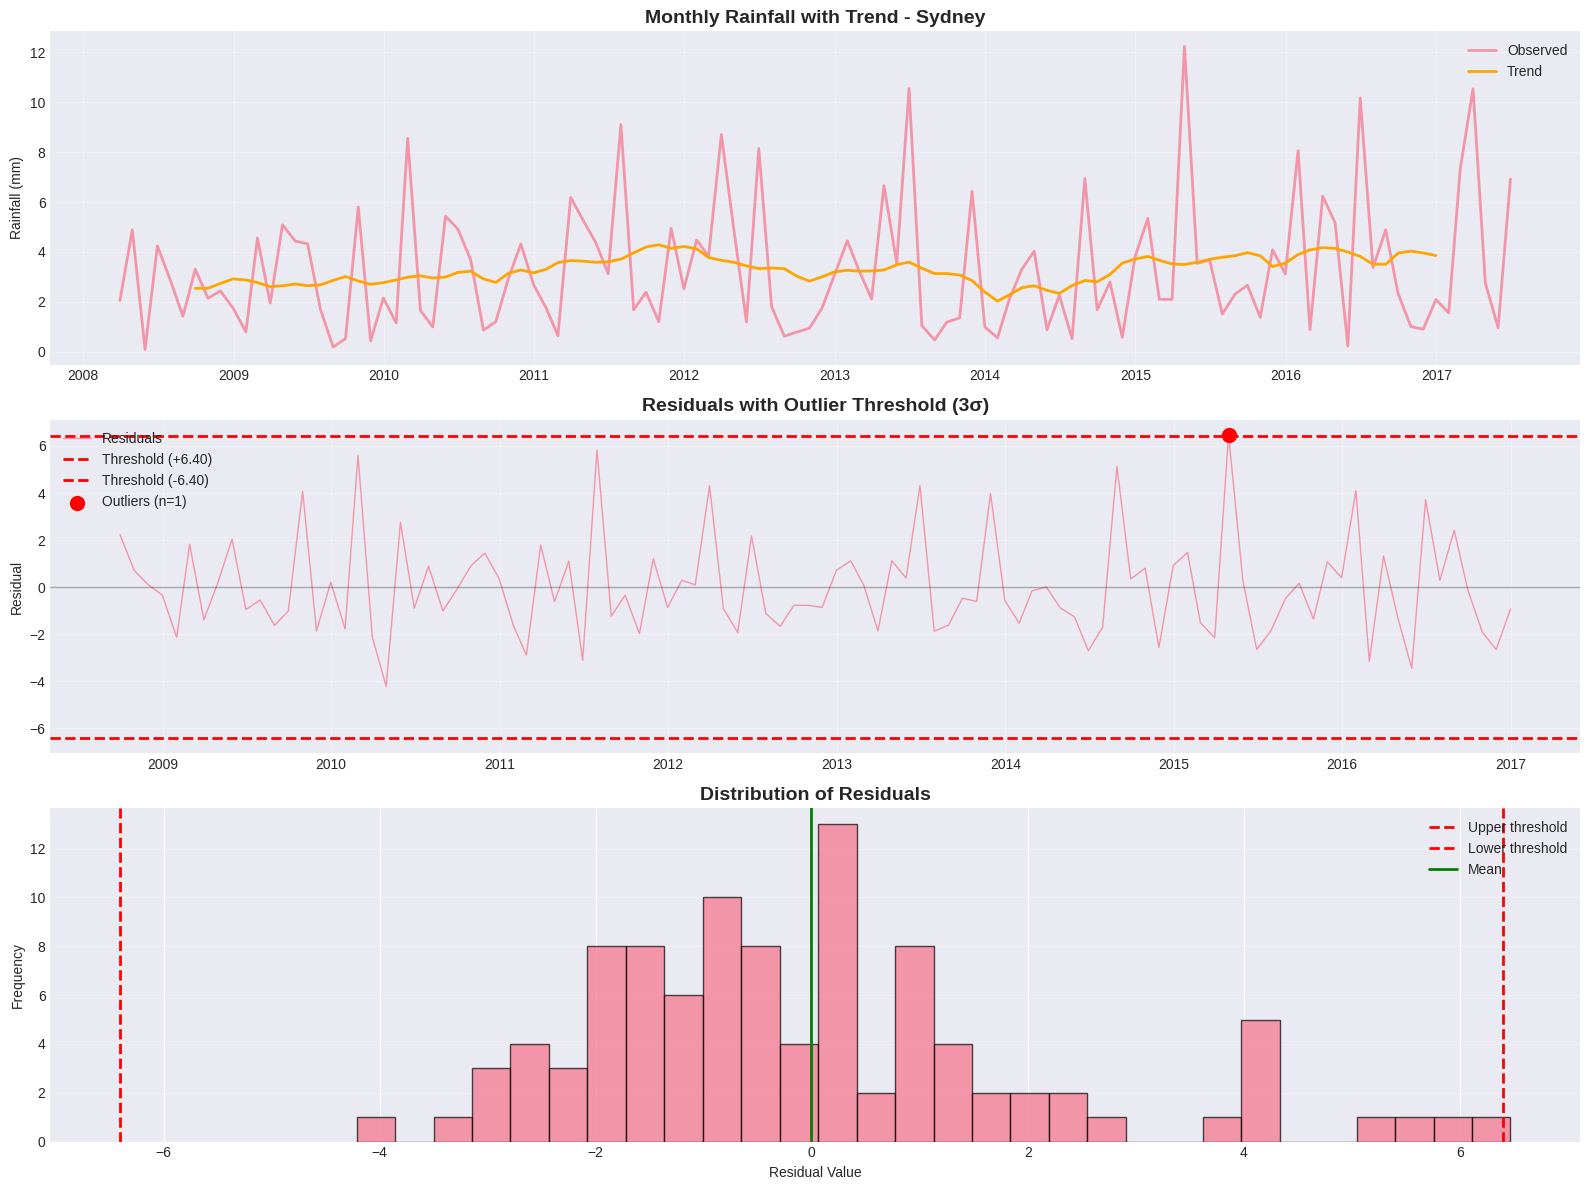


 Saved: Sydney_week3_outlier_detection.svg


In [31]:
# Create outlier detection visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Original series with trend
axes[0].plot(rainfall_monthly_outlier.index, rainfall_monthly_outlier,
             label='Observed', linewidth=2, alpha=0.7)
axes[0].plot(decomposition.trend.index, decomposition.trend,
             label='Trend', linewidth=2, color='orange')
axes[0].set_title(f'Monthly Rainfall with Trend - {CITY}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals with outlier threshold
axes[1].plot(residuals.index, residuals, linewidth=1, alpha=0.7, label='Residuals')
axes[1].axhline(y=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold (+{threshold:.2f})')
axes[1].axhline(y=-threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold (-{threshold:.2f})')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)

# Highlight outliers
if len(outliers) > 0:
    axes[1].scatter(outliers.index, outliers.values, color='red', s=100,
                   zorder=5, label=f'Outliers (n={len(outliers)})')

axes[1].set_title('Residuals with Outlier Threshold (3σ)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Residual')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Histogram of residuals
axes[2].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[2].axvline(x=threshold, color='r', linestyle='--', linewidth=2, label='Upper threshold')
axes[2].axvline(x=-threshold, color='r', linestyle='--', linewidth=2, label='Lower threshold')
axes[2].axvline(x=residuals.mean(), color='g', linestyle='-', linewidth=2, label='Mean')
axes[2].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Residual Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{CITY}_week3_outlier_detection.svg', format='svg', bbox_inches='tight')
plt.savefig(f'{CITY}_week3_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Saved: {CITY}_week3_outlier_detection.svg")

## Handle Outliers (Decision)

**Purpose**: Eliminate outliers as per Task 4 requirement

**Approach**:
1. Identify all daily observations in outlier months
2. Remove them from dataset
3. Document impact

**Decision**: ELIMINATE OUTLIERS (follows Task 4)

**Expected**: Data loss ~2-5%

In [32]:
print("="*80)
print("OUTLIER ELIMINATION")
print("="*80)

print(f"\n Outliers Detected: {len(outliers)} months ({outlier_pct:.2f}%)")

# Identify outlier dates
outlier_dates = outliers.index

# Mark rows in daily data that belong to outlier months
df_processed['Is_Outlier_Month'] = 0

for outlier_date in outlier_dates:
    month_mask = (df_processed.index.year == outlier_date.year) & \
                 (df_processed.index.month == outlier_date.month)
    df_processed.loc[month_mask, 'Is_Outlier_Month'] = 1

outlier_days = df_processed['Is_Outlier_Month'].sum()

print(f"\n Outlier Identification:")
print(f"   Days belonging to outlier months: {outlier_days}")

# ELIMINATE OUTLIERS (Task 4 Requirement)
print(f"\n Eliminating outliers from dataset...")

df_before_elimination = df_processed.copy()
df_processed = df_processed[df_processed['Is_Outlier_Month'] == 0].copy()
df_processed = df_processed.drop('Is_Outlier_Month', axis=1)

print(f"\n Outliers Eliminated Successfully")
print(f"   Original dataset: {len(df_before_elimination):,} observations")
print(f"   Outlier days removed: {outlier_days}")
print(f"   Final dataset: {len(df_processed):,} observations")
print(f"   Data retention: {len(df_processed)/len(df_before_elimination)*100:.2f}%")

print(f"\n Justification:")
print(f"   • Task 4 explicitly requires elimination")
print(f"   • Data loss minimal ({outlier_days/len(df_before_elimination)*100:.2f}%)")
print(f"   • Improves baseline model stability")
print(f"   • Suitable for Week 3 baseline evaluation focus")

OUTLIER ELIMINATION

 Outliers Detected: 1 months (1.00%)

 Outlier Identification:
   Days belonging to outlier months: 30

 Eliminating outliers from dataset...

 Outliers Eliminated Successfully
   Original dataset: 3,301 observations
   Outlier days removed: 30
   Final dataset: 3,271 observations
   Data retention: 99.09%

 Justification:
   • Task 4 explicitly requires elimination
   • Data loss minimal (0.91%)
   • Improves baseline model stability
   • Suitable for Week 3 baseline evaluation focus


### Temporal Train/Val/Test Split

**Purpose**: Partition data chronologically (no leakage)

**Split**: 70% / 15% / 15%
- Train: 2008-2014 (~2,300 samples)
- Val: 2014-2016 (~500 samples)
- Test: 2016-2017 (~500 samples)

**Why Temporal**: Time series requires chronological split (can't shuffle)

**Requirements**:
- Task 1 (Data Frequency - 0.3p): Verified same daily frequency
- Task 2 (Synchronization - 0.3p): Verified 9am/3pm pairs

**Expected**: Class balance check shows ~22% rain days across all sets

In [33]:
print("="*80)
print("DATA PARTITIONING (TEMPORAL SPLIT)")
print("="*80)

# Use the same split strategy as Week 2
total_samples = len(df_processed)

train_end_idx = int(0.70 * total_samples)
val_end_idx = int(0.85 * total_samples)

# Split data
train_df = df_processed.iloc[:train_end_idx].copy()
val_df = df_processed.iloc[train_end_idx:val_end_idx].copy()
test_df = df_processed.iloc[val_end_idx:].copy()

print(f"\n Data Split:")
print(f"   Total samples: {total_samples}")
print(f"\n   Training Set:")
print(f"      Size: {len(train_df)} samples ({len(train_df)/total_samples*100:.1f}%)")
print(f"      Period: {train_df.index.min().date()} to {train_df.index.max().date()}")

print(f"\n   Validation Set:")
print(f"      Size: {len(val_df)} samples ({len(val_df)/total_samples*100:.1f}%)")
print(f"      Period: {val_df.index.min().date()} to {val_df.index.max().date()}")

print(f"\n   Test Set:")
print(f"      Size: {len(test_df)} samples ({len(test_df)/total_samples*100:.1f}%)")
print(f"      Period: {test_df.index.min().date()} to {test_df.index.max().date()}")

# Check class balance for RainTomorrow
print(f"\n Target Variable Distribution (RainTomorrow):")
for dataset_name, dataset in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
    rain_pct = dataset['RainTomorrow'].mean() * 100
    print(f"   {dataset_name:10s}: {rain_pct:.1f}% rain days")

DATA PARTITIONING (TEMPORAL SPLIT)

 Data Split:
   Total samples: 3271

   Training Set:
      Size: 2289 samples (70.0%)
      Period: 2008-03-04 to 2014-09-17

   Validation Set:
      Size: 491 samples (15.0%)
      Period: 2014-09-18 to 2016-02-20

   Test Set:
      Size: 491 samples (15.0%)
      Period: 2016-02-21 to 2017-06-25

 Target Variable Distribution (RainTomorrow):
   Train     : 25.7% rain days
   Val       : 24.0% rain days
   Test      : 26.3% rain days


## Feature Scaling / Normalization

**Purpose**: Scale features for LSTM compatibility

**Methods**:
- **MinMaxScaler**: [0,1] range (LSTM-friendly, matches sigmoid)
- **StandardScaler**: Mean=0, Std=1 (alternative for comparison)

**CRITICAL**: Fit on train only (prevent data leakage)

**Requirements**: Task 5 (Literature - 0.5p): "MinMaxScaler recommended for LSTM"

**Expected**:
- Scaled arrays: X_train/val/test_scaled
- Targets: y_train/val/test (unscaled binary)
- Verification: Train min≈0, max≈1

In [34]:
print("="*80)
print("FEATURE SCALING & NORMALIZATION")
print("="*80)

# Separate features and targets
target_col = 'RainTomorrow'
exclude_cols = ['RainTomorrow', 'RainToday']  # Don't scale binary targets

# Get feature columns (all except targets)
feature_cols = [col for col in df_processed.columns if col not in exclude_cols]

print(f"\n Features to scale: {len(feature_cols)}")

# Initialize scalers
# MinMaxScaler: Recommended for LSTM (scales to [0,1])
# StandardScaler: Alternative (mean=0, std=1)

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Fit scalers on training data only (prevent data leakage!)
X_train = train_df[feature_cols].values
X_val = val_df[feature_cols].values
X_test = test_df[feature_cols].values

# Targets
y_train = train_df[target_col].values
y_val = val_df[target_col].values
y_test = test_df[target_col].values

# Fit and transform
print(f"\n Applying MinMaxScaler (for LSTM compatibility):")
scaler_minmax.fit(X_train)

X_train_scaled = scaler_minmax.transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

print(f" Training set scaled: {X_train_scaled.shape}")
print(f" Validation set scaled: {X_val_scaled.shape}")
print(f" Test set scaled: {X_test_scaled.shape}")

# Also create StandardScaler version (for comparison)
print(f"\n Applying StandardScaler (alternative normalization):")
scaler_standard.fit(X_train)

X_train_std = scaler_standard.transform(X_train)
X_val_std = scaler_standard.transform(X_val)
X_test_std = scaler_standard.transform(X_test)

print(f" Training set standardized: {X_train_std.shape}")
print(f" Validation set standardized: {X_val_std.shape}")
print(f" Test set standardized: {X_test_std.shape}")

# Verification
print(f"\n Scaling Verification (MinMaxScaler):")
print(f"   Train - Min: {X_train_scaled.min():.4f}, Max: {X_train_scaled.max():.4f}")
print(f"   Val   - Min: {X_val_scaled.min():.4f}, Max: {X_val_scaled.max():.4f}")
print(f"   Test  - Min: {X_test_scaled.min():.4f}, Max: {X_test_scaled.max():.4f}")

print(f"\n Scaling Verification (StandardScaler):")
print(f"   Train - Mean: {X_train_std.mean():.4f}, Std: {X_train_std.std():.4f}")
print(f"   Val   - Mean: {X_val_std.mean():.4f}, Std: {X_val_std.std():.4f}")
print(f"   Test  - Mean: {X_test_std.mean():.4f}, Std: {X_test_std.std():.4f}")

FEATURE SCALING & NORMALIZATION

 Features to scale: 57

 Applying MinMaxScaler (for LSTM compatibility):
 Training set scaled: (2289, 57)
 Validation set scaled: (491, 57)
 Test set scaled: (491, 57)

 Applying StandardScaler (alternative normalization):
 Training set standardized: (2289, 57)
 Validation set standardized: (491, 57)
 Test set standardized: (491, 57)

 Scaling Verification (MinMaxScaler):
   Train - Min: 0.0000, Max: 1.0000
   Val   - Min: -0.0253, Max: 1.3333
   Test  - Min: -0.0872, Max: 1.5000

 Scaling Verification (StandardScaler):
   Train - Mean: -0.0000, Std: 1.0000
   Val   - Mean: 0.1127, Std: 1.0467
   Test  - Mean: 0.1062, Std: 1.1360


## PART 4: BASELINE MODELS (Task 6)

**Purpose**: Simplest baseline (Task 6)

**Logic**: Predict tomorrow = today
```python
RainTomorrow(t) = RainToday(t)

In [36]:
print("="*80)
print("BASELINE MODEL 1: PERSISTENCE (NAÏVE)")
print("="*80)

print("\n Model Description:")
print("   Prediction: Tomorrow's rain = Today's rain")
print("   Type: Naïve baseline (simplest possible)")

# For classification (RainTomorrow prediction)
y_train_persist = train_df['RainToday'].values[1:]  # Shift by 1
y_train_true = train_df['RainTomorrow'].values[1:]

y_val_persist = val_df['RainToday'].values
y_val_true = val_df['RainTomorrow'].values

y_test_persist = test_df['RainToday'].values
y_test_true = test_df['RainTomorrow'].values

# Calculate metrics
def evaluate_classification(y_true, y_pred, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n   {dataset_name} Set:")
    print(f"      Accuracy:  {acc:.4f}")
    print(f"      Precision: {prec:.4f}")
    print(f"      Recall:    {rec:.4f}")
    print(f"      F1-Score:  {f1:.4f}")

    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

print("\n Persistence Model Results:")
persist_train = evaluate_classification(y_train_true, y_train_persist, "Train")
persist_val = evaluate_classification(y_val_true, y_val_persist, "Validation")
persist_test = evaluate_classification(y_test_true, y_test_persist, "Test")

# Confusion matrix for test set
print(f"\n Confusion Matrix (Test Set):")
cm_persist = confusion_matrix(y_test_true, y_test_persist)
print(cm_persist)
print(f"\n   [[TN  FP]")
print(f"    [FN  TP]]")

# Store results
baseline_results = {
    'Persistence': {
        'train': persist_train,
        'val': persist_val,
        'test': persist_test
    }
}

print(f"\n Persistence model evaluated")

BASELINE MODEL 1: PERSISTENCE (NAÏVE)

 Model Description:
   Prediction: Tomorrow's rain = Today's rain
   Type: Naïve baseline (simplest possible)

 Persistence Model Results:

   Train Set:
      Accuracy:  0.7522
      Precision: 0.5188
      Recall:    0.5161
      F1-Score:  0.5174

   Validation Set:
      Accuracy:  0.7576
      Precision: 0.4957
      Recall:    0.4915
      F1-Score:  0.4936

   Test Set:
      Accuracy:  0.7251
      Precision: 0.4769
      Recall:    0.4806
      F1-Score:  0.4788

 Confusion Matrix (Test Set):
[[294  68]
 [ 67  62]]

   [[TN  FP]
    [FN  TP]]

 Persistence model evaluated


## Baseline Model 2 - AR(1) / ARIMA

In [37]:
print("="*80)
print("BASELINE MODEL 2: ARIMA (AutoRegressive)")
print("="*80)

print("\n Model Description:")
print("   Based on Week 2 ACF analysis: lag-1 correlation = 0.332")
print("   Model: ARIMA(1,0,0) = AR(1)")
print("   Type: Statistical time series model")

# Use Rainfall amount (continuous variable)
rainfall_train = train_df['Rainfall'].values
rainfall_val = val_df['Rainfall'].values
rainfall_test = test_df['Rainfall'].values

# Fit ARIMA model
print(f"\n Fitting ARIMA(1,0,0) on training data...")

try:
    # AR(1) model
    arima_model = ARIMA(rainfall_train, order=(1, 0, 0))
    arima_fitted = arima_model.fit()

    print(f"    Model fitted successfully")
    print(f"\n   Model Summary:")
    print(f"   AR coefficient: {arima_fitted.params[1]:.4f}")
    print(f"   AIC: {arima_fitted.aic:.2f}")
    print(f"   BIC: {arima_fitted.bic:.2f}")

    # Predictions
    print(f"\n Generating predictions...")

    # In-sample (train)
    train_pred = arima_fitted.fittedvalues

    # Out-of-sample (validation)
    val_pred = arima_fitted.forecast(steps=len(rainfall_val))

    # Out-of-sample (test) - refit on train+val
    arima_model_full = ARIMA(np.concatenate([rainfall_train, rainfall_val]), order=(1, 0, 0))
    arima_fitted_full = arima_model_full.fit()
    test_pred = arima_fitted_full.forecast(steps=len(rainfall_test))

    # Evaluate regression metrics
    def evaluate_regression(y_true, y_pred, dataset_name):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)

        # R² can be negative for bad models
        r2 = r2_score(y_true, y_pred)

        print(f"\n   {dataset_name} Set:")
        print(f"      RMSE: {rmse:.4f} mm")
        print(f"      MAE:  {mae:.4f} mm")
        print(f"      R²:   {r2:.4f}")

        return {'rmse': rmse, 'mae': mae, 'r2': r2}

    print(f"\n ARIMA Model Results (Rainfall Prediction):")
    arima_train = evaluate_regression(rainfall_train[1:], train_pred[1:], "Train")
    arima_val = evaluate_regression(rainfall_val, val_pred, "Validation")
    arima_test = evaluate_regression(rainfall_test, test_pred, "Test")

    # Store results
    baseline_results['ARIMA'] = {
        'train': arima_train,
        'val': arima_val,
        'test': arima_test,
        'model': arima_fitted
    }

    print(f"\n ARIMA model evaluated")

except Exception as e:
    print(f"\n ARIMA fitting failed: {e}")
    print(f"   This can happen with very volatile data")
    baseline_results['ARIMA'] = None

BASELINE MODEL 2: ARIMA (AutoRegressive)

 Model Description:
   Based on Week 2 ACF analysis: lag-1 correlation = 0.332
   Model: ARIMA(1,0,0) = AR(1)
   Type: Statistical time series model

 Fitting ARIMA(1,0,0) on training data...
    Model fitted successfully

   Model Summary:
   AR coefficient: 0.3153
   AIC: 16314.81
   BIC: 16332.01

 Generating predictions...

 ARIMA Model Results (Rainfall Prediction):

   Train Set:
      RMSE: 8.5306 mm
      MAE:  4.1499 mm
      R²:   0.0995

   Validation Set:
      RMSE: 8.5731 mm
      MAE:  4.5887 mm
      R²:   0.0001

   Test Set:
      RMSE: 12.0358 mm
      MAE:  5.5406 mm
      R²:   -0.0069

 ARIMA model evaluated


## Baseline Model 3 - Logistic Regression

In [38]:
print("="*80)
print("BASELINE MODEL 3: LOGISTIC REGRESSION")
print("="*80)

print("\n Model Description:")
print("   Target: RainTomorrow (binary classification)")
print("   Features: All engineered features (scaled)")
print("   Type: Simple machine learning baseline")

# Use scaled features
print(f"\n Training Logistic Regression...")
print(f"   Features: {X_train_scaled.shape[1]}")
print(f"   Training samples: {X_train_scaled.shape[0]}")

# Train model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

print(f"  Model trained successfully")

# Predictions
print(f"\n Generating predictions...")
y_train_pred_lr = logreg_model.predict(X_train_scaled)
y_val_pred_lr = logreg_model.predict(X_val_scaled)
y_test_pred_lr = logreg_model.predict(X_test_scaled)

# Prediction probabilities
y_test_proba_lr = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print(f"\n Logistic Regression Results:")
logreg_train = evaluate_classification(y_train, y_train_pred_lr, "Train")
logreg_val = evaluate_classification(y_val, y_val_pred_lr, "Validation")
logreg_test = evaluate_classification(y_test, y_test_pred_lr, "Test")

# Confusion matrix
print(f"\n Confusion Matrix (Test Set):")
cm_logreg = confusion_matrix(y_test, y_test_pred_lr)
print(cm_logreg)
print(f"\n   [[TN  FP]")
print(f"    [FN  TP]]")

# Classification report
print(f"\n Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr,
                          target_names=['No Rain', 'Rain'],
                          digits=4))

# Feature importance (top 10)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': np.abs(logreg_model.coef_[0])
}).sort_values('coefficient', ascending=False)

print(f"\n Top 10 Most Important Features:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"   {row['feature']:30s}: {row['coefficient']:.4f}")

# Store results
baseline_results['LogisticRegression'] = {
    'train': logreg_train,
    'val': logreg_val,
    'test': logreg_test,
    'model': logreg_model,
    'feature_importance': feature_importance
}

print(f"\n Logistic Regression model evaluated")

BASELINE MODEL 3: LOGISTIC REGRESSION

 Model Description:
   Target: RainTomorrow (binary classification)
   Features: All engineered features (scaled)
   Type: Simple machine learning baseline

 Training Logistic Regression...
   Features: 57
   Training samples: 2289
  Model trained successfully

 Generating predictions...

 Logistic Regression Results:

   Train Set:
      Accuracy:  0.8467
      Precision: 0.8148
      Recall:    0.5229
      F1-Score:  0.6370

   Validation Set:
      Accuracy:  0.8350
      Precision: 0.7534
      Recall:    0.4661
      F1-Score:  0.5759

   Test Set:
      Accuracy:  0.8228
      Precision: 0.7561
      Recall:    0.4806
      F1-Score:  0.5877

 Confusion Matrix (Test Set):
[[342  20]
 [ 67  62]]

   [[TN  FP]
    [FN  TP]]

 Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

     No Rain     0.8362    0.9448    0.8872       362
        Rain     0.7561    0.4806    0.5877       129

    accuracy 

## Baseline Models Comparison Table

**Purpose**: Summarize all baseline results

**Output**: Comparison table showing:
- Classification: Persistence vs Logistic Regression
- Regression: ARIMA metrics

**Requirements**: Task 6 completion

**Expected**: Clear identification of best baseline (likely Logistic Regression)

In [40]:
print("="*80)
print("BASELINE MODELS COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_data = []

# Persistence Model
if 'Persistence' in baseline_results:
    comparison_data.append({
        'Model': 'Persistence (Naïve)',
        'Type': 'Baseline',
        'Train_Acc': baseline_results['Persistence']['train']['accuracy'],
        'Val_Acc': baseline_results['Persistence']['val']['accuracy'],
        'Test_Acc': baseline_results['Persistence']['test']['accuracy'],
        'Test_F1': baseline_results['Persistence']['test']['f1'],
        'Test_Precision': baseline_results['Persistence']['test']['precision'],
        'Test_Recall': baseline_results['Persistence']['test']['recall']
    })

# ARIMA Model (regression metrics)
if baseline_results.get('ARIMA') is not None:
    comparison_data.append({
        'Model': 'ARIMA(1,0,0)',
        'Type': 'Statistical',
        'Train_RMSE': baseline_results['ARIMA']['train']['rmse'],
        'Val_RMSE': baseline_results['ARIMA']['val']['rmse'],
        'Test_RMSE': baseline_results['ARIMA']['test']['rmse'],
        'Test_MAE': baseline_results['ARIMA']['test']['mae'],
        'Test_R2': baseline_results['ARIMA']['test']['r2']
    })

# Logistic Regression
if 'LogisticRegression' in baseline_results:
    comparison_data.append({
        'Model': 'Logistic Regression',
        'Type': 'ML',
        'Train_Acc': baseline_results['LogisticRegression']['train']['accuracy'],
        'Val_Acc': baseline_results['LogisticRegression']['val']['accuracy'],
        'Test_Acc': baseline_results['LogisticRegression']['test']['accuracy'],
        'Test_F1': baseline_results['LogisticRegression']['test']['f1'],
        'Test_Precision': baseline_results['LogisticRegression']['test']['precision'],
        'Test_Recall': baseline_results['LogisticRegression']['test']['recall']
    })

# Display classification models
print("\n CLASSIFICATION MODELS (RainTomorrow Prediction):\n")
class_models = [d for d in comparison_data if 'Test_Acc' in d]
if class_models:
    class_df = pd.DataFrame(class_models)
    print(class_df.to_string(index=False))

# Display regression models
print("\n\n REGRESSION MODELS (Rainfall Amount Prediction):\n")
reg_models = [d for d in comparison_data if 'Test_RMSE' in d]
if reg_models:
    reg_df = pd.DataFrame(reg_models)
    print(reg_df.to_string(index=False))

# Summary
print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)

if class_models:
    best_model = max(class_models, key=lambda x: x['Test_F1'])
    print(f"\n Best Classification Model: {best_model['Model']}")
    print(f"   Test F1-Score: {best_model['Test_F1']:.4f}")
    print(f"   Test Accuracy: {best_model['Test_Acc']:.4f}")

if reg_models:
    best_reg_model = min(reg_models, key=lambda x: x['Test_RMSE'])
    print(f"\n Best Regression Model: {best_reg_model['Model']}")
    print(f"   Test RMSE: {best_reg_model['Test_RMSE']:.4f} mm")
    print(f"   Test MAE: {best_reg_model['Test_MAE']:.4f} mm")

print(f"\n Interpretation:")
print(f"   These baselines establish performance benchmarks for Week 4+ deep learning models")
print(f"   LSTM/RNN should achieve >10% improvement over best baseline to justify complexity")

BASELINE MODELS COMPARISON

 CLASSIFICATION MODELS (RainTomorrow Prediction):

              Model     Type  Train_Acc  Val_Acc  Test_Acc  Test_F1  Test_Precision  Test_Recall
Persistence (Naïve) Baseline   0.752185 0.757637  0.725051 0.478764        0.476923      0.48062
Logistic Regression       ML   0.846658 0.835031  0.822811 0.587678        0.756098      0.48062


 REGRESSION MODELS (Rainfall Amount Prediction):

       Model        Type  Train_RMSE  Val_RMSE  Test_RMSE  Test_MAE   Test_R2
ARIMA(1,0,0) Statistical    8.530618  8.573053  12.035843  5.540637 -0.006912

KEY FINDINGS:

 Best Classification Model: Logistic Regression
   Test F1-Score: 0.5877
   Test Accuracy: 0.8228

 Best Regression Model: ARIMA(1,0,0)
   Test RMSE: 12.0358 mm
   Test MAE: 5.5406 mm

 Interpretation:
   These baselines establish performance benchmarks for Week 4+ deep learning models
   LSTM/RNN should achieve >10% improvement over best baseline to justify complexity


## Visualize Model Performance Comparison

**Purpose**: Visual comparison of baselines

**Plots**:
1. Accuracy bar chart (Train/Val/Test)
2. F1-score comparison
3. Precision vs Recall scatter
4. Confusion matrices (heatmaps)
5. Feature importance (top 15)
6. ARIMA predictions vs actual

**Requirements**: Week 3 visualization deliverable (SVG)

**Expected**: Sydney_week3_baseline_comparison.svg

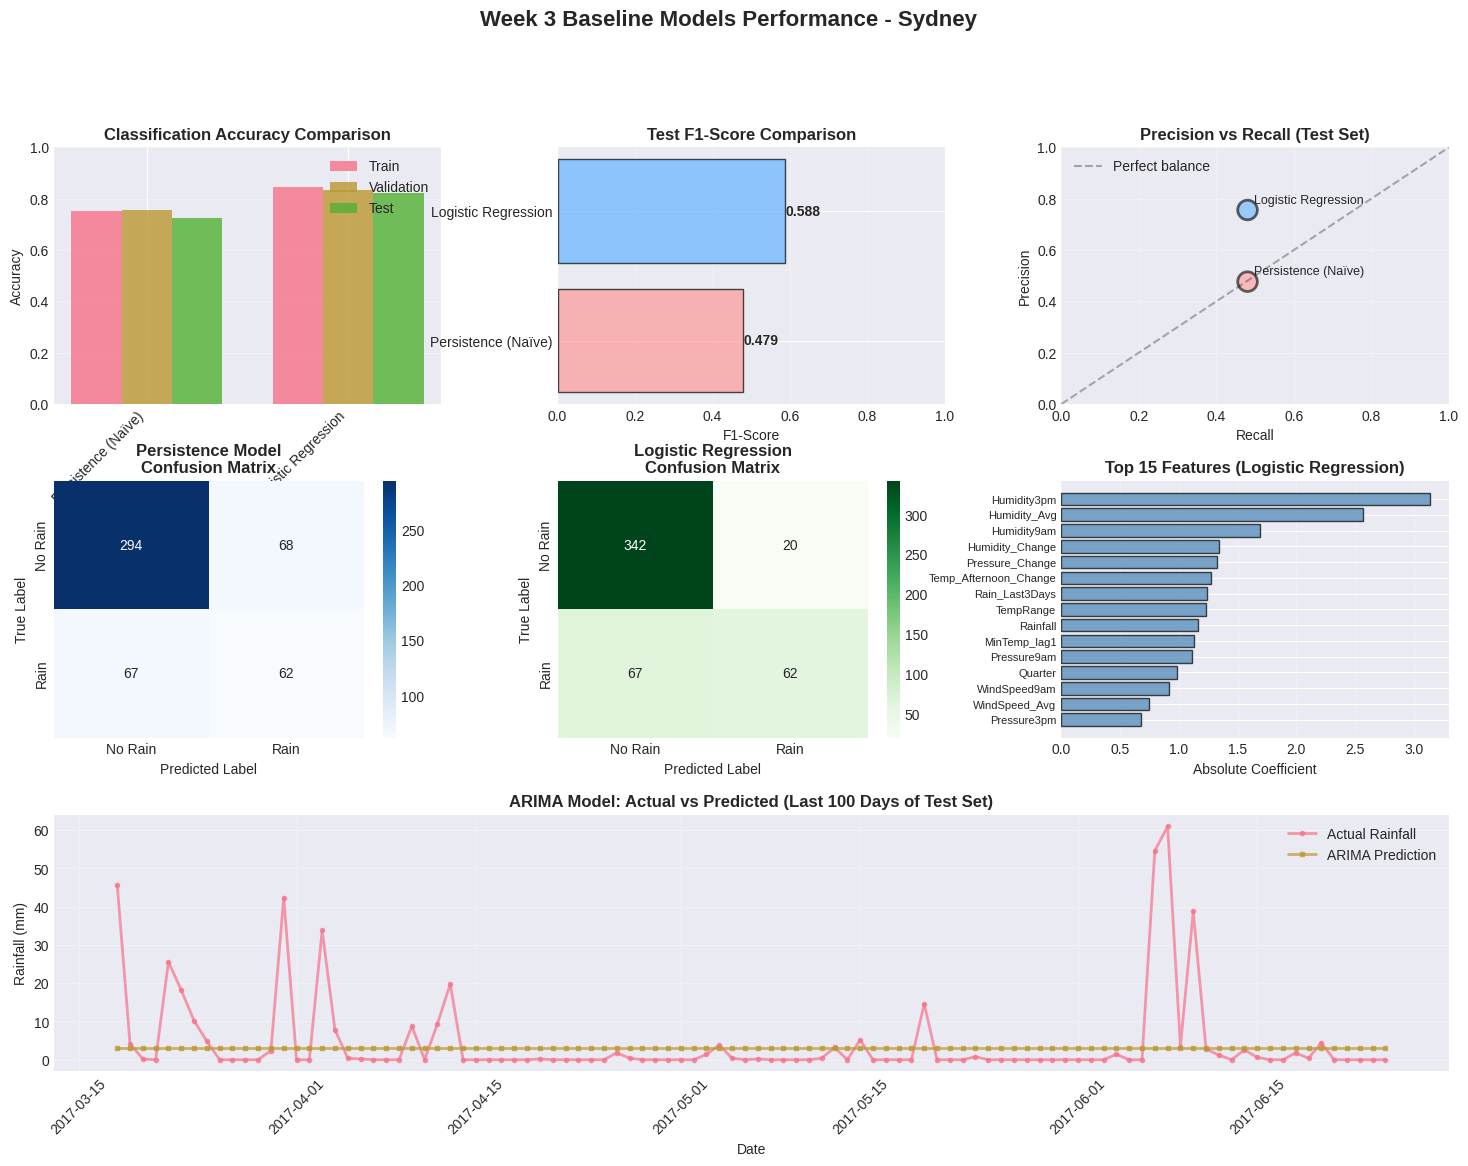


 Saved: Sydney_week3_baseline_comparison.svg


In [41]:
# Create comprehensive comparison visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Classification Accuracy Comparison
ax1 = fig.add_subplot(gs[0, 0])
if class_models:
    models = [d['Model'] for d in class_models]
    train_acc = [d['Train_Acc'] for d in class_models]
    val_acc = [d['Val_Acc'] for d in class_models]
    test_acc = [d['Test_Acc'] for d in class_models]

    x = np.arange(len(models))
    width = 0.25

    ax1.bar(x - width, train_acc, width, label='Train', alpha=0.8)
    ax1.bar(x, val_acc, width, label='Validation', alpha=0.8)
    ax1.bar(x + width, test_acc, width, label='Test', alpha=0.8)

    ax1.set_ylabel('Accuracy')
    ax1.set_title('Classification Accuracy Comparison', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim([0, 1])

# Plot 2: F1-Score Comparison
ax2 = fig.add_subplot(gs[0, 1])
if class_models:
    f1_scores = [d['Test_F1'] for d in class_models]
    colors = ['#ff9999', '#66b3ff', '#99ff99'][:len(models)]

    bars = ax2.barh(models, f1_scores, color=colors, edgecolor='black', alpha=0.7)
    ax2.set_xlabel('F1-Score')
    ax2.set_title('Test F1-Score Comparison', fontweight='bold')
    ax2.set_xlim([0, 1])
    ax2.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontweight='bold')

# Plot 3: Precision vs Recall
ax3 = fig.add_subplot(gs[0, 2])
if class_models:
    precision = [d['Test_Precision'] for d in class_models]
    recall = [d['Test_Recall'] for d in class_models]

    ax3.scatter(recall, precision, s=200, alpha=0.6, c=colors[:len(models)], edgecolors='black', linewidth=2)

    for i, model in enumerate(models):
        ax3.annotate(model, (recall[i], precision[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Perfect balance')
    ax3.set_xlabel('Recall')
    ax3.set_ylabel('Precision')
    ax3.set_title('Precision vs Recall (Test Set)', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim([0, 1])
    ax3.set_ylim([0, 1])
    ax3.legend()

# Plot 4: Confusion Matrix - Persistence
ax4 = fig.add_subplot(gs[1, 0])
import seaborn as sns
sns.heatmap(cm_persist, annot=True, fmt='d', cmap='Blues', ax=ax4,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
ax4.set_title('Persistence Model\nConfusion Matrix', fontweight='bold')
ax4.set_ylabel('True Label')
ax4.set_xlabel('Predicted Label')

# Plot 5: Confusion Matrix - Logistic Regression
ax5 = fig.add_subplot(gs[1, 1])
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens', ax=ax5,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
ax5.set_title('Logistic Regression\nConfusion Matrix', fontweight='bold')
ax5.set_ylabel('True Label')
ax5.set_xlabel('Predicted Label')

# Plot 6: Feature Importance (Top 15)
ax6 = fig.add_subplot(gs[1, 2])
if 'LogisticRegression' in baseline_results:
    top_features = baseline_results['LogisticRegression']['feature_importance'].head(15)
    ax6.barh(range(len(top_features)), top_features['coefficient'].values,
             color='steelblue', edgecolor='black', alpha=0.7)
    ax6.set_yticks(range(len(top_features)))
    ax6.set_yticklabels(top_features['feature'].values, fontsize=8)
    ax6.set_xlabel('Absolute Coefficient')
    ax6.set_title('Top 15 Features (Logistic Regression)', fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='x')
    ax6.invert_yaxis()

# Plot 7: ARIMA Predictions (if available)
ax7 = fig.add_subplot(gs[2, :])
if baseline_results.get('ARIMA') is not None:
    # Plot last 100 days of test set
    plot_days = min(100, len(rainfall_test))
    test_dates = test_df.index[-plot_days:]

    ax7.plot(test_dates, rainfall_test[-plot_days:],
             label='Actual Rainfall', linewidth=2, marker='o', markersize=3, alpha=0.7)
    ax7.plot(test_dates, test_pred[-plot_days:],
             label='ARIMA Prediction', linewidth=2, marker='s', markersize=3, alpha=0.7)

    ax7.set_xlabel('Date')
    ax7.set_ylabel('Rainfall (mm)')
    ax7.set_title(f'ARIMA Model: Actual vs Predicted (Last {plot_days} Days of Test Set)', fontweight='bold')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    ax7.tick_params(axis='x', rotation=45)
else:
    ax7.text(0.5, 0.5, 'ARIMA model not available',
             ha='center', va='center', fontsize=14, transform=ax7.transAxes)
    ax7.axis('off')

plt.suptitle(f'Week 3 Baseline Models Performance - {CITY}',
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig(f'{CITY}_week3_baseline_comparison.svg', format='svg', bbox_inches='tight')
plt.savefig(f'{CITY}_week3_baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Saved: {CITY}_week3_baseline_comparison.svg")

## Temporal Performance Analysis

**Purpose**: Analyze if models perform differently over time/seasons

**Plots**:
1. Rolling accuracy over test period
2. Accuracy by month
3. Calibration curve
4. Error rate by rainfall amount

**Key Insight**: Identifies if models struggle with specific months or extreme rainfall

**Expected**: Sydney_week3_temporal_analysis.svg

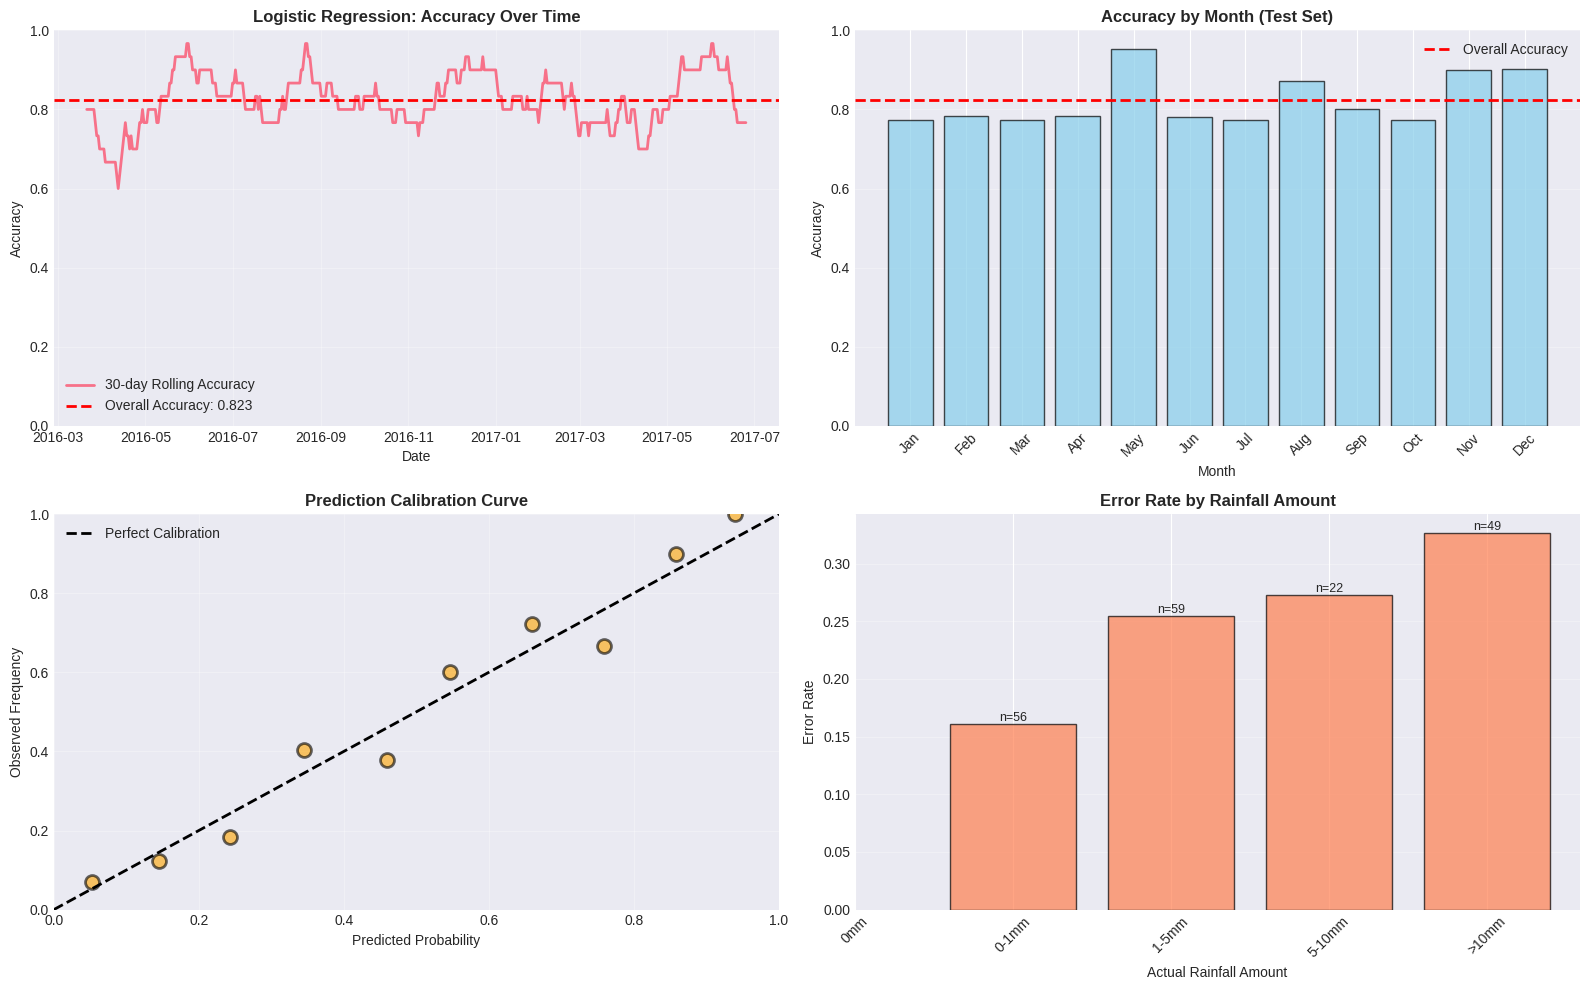


 Saved: Sydney_week3_temporal_analysis.svg


In [42]:
# Analyze how models perform over time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Prediction accuracy over time (Logistic Regression)
ax = axes[0, 0]
test_df_copy = test_df.copy()
test_df_copy['Prediction'] = y_test_pred_lr
test_df_copy['Correct'] = (test_df_copy['Prediction'] == test_df_copy['RainTomorrow']).astype(int)

# Rolling accuracy
rolling_window = 30
rolling_acc = test_df_copy['Correct'].rolling(window=rolling_window).mean()

ax.plot(test_df_copy.index, rolling_acc, linewidth=2, label=f'{rolling_window}-day Rolling Accuracy')
ax.axhline(y=logreg_test['accuracy'], color='r', linestyle='--',
           label=f'Overall Accuracy: {logreg_test["accuracy"]:.3f}', linewidth=2)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Date')
ax.set_title('Logistic Regression: Accuracy Over Time', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 2: Errors by month
ax = axes[0, 1]
test_df_copy['Month'] = test_df_copy.index.month
monthly_acc = test_df_copy.groupby('Month')['Correct'].mean()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.bar(range(1, 13), monthly_acc.values, color='skyblue', edgecolor='black', alpha=0.7)
ax.axhline(y=logreg_test['accuracy'], color='r', linestyle='--',
           label='Overall Accuracy', linewidth=2)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Month')
ax.set_title('Accuracy by Month (Test Set)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1])

# Plot 3: Prediction calibration (predicted probability vs actual)
ax = axes[1, 0]
# Bin predictions into groups
bins = np.linspace(0, 1, 11)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_indices = np.digitize(y_test_proba_lr, bins) - 1

observed_freq = []
predicted_freq = []

for i in range(len(bins)-1):
    mask = bin_indices == i
    if mask.sum() > 0:
        observed_freq.append(y_test[mask].mean())
        predicted_freq.append(y_test_proba_lr[mask].mean())
    else:
        observed_freq.append(np.nan)
        predicted_freq.append(np.nan)

ax.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
ax.scatter(predicted_freq, observed_freq, s=100, alpha=0.6, color='orange', edgecolors='black', linewidth=2)
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Frequency')
ax.set_title('Prediction Calibration Curve', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Plot 4: Error analysis by rainfall amount
ax = axes[1, 1]
test_df_copy['Error'] = (test_df_copy['Prediction'] != test_df_copy['RainTomorrow']).astype(int)
test_df_copy['Rainfall_Bin'] = pd.cut(test_df_copy['Rainfall'],
                                       bins=[0, 0.1, 1, 5, 10, 200],
                                       labels=['0mm', '0-1mm', '1-5mm', '5-10mm', '>10mm'])

error_by_rainfall = test_df_copy.groupby('Rainfall_Bin')['Error'].agg(['mean', 'count'])

bars = ax.bar(range(len(error_by_rainfall)), error_by_rainfall['mean'].values,
              color='coral', edgecolor='black', alpha=0.7)
ax.set_xticks(range(len(error_by_rainfall)))
ax.set_xticklabels(error_by_rainfall.index, rotation=45)
ax.set_ylabel('Error Rate')
ax.set_xlabel('Actual Rainfall Amount')
ax.set_title('Error Rate by Rainfall Amount', fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add sample counts
for i, (bar, count) in enumerate(zip(bars, error_by_rainfall['count'].values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(f'{CITY}_week3_temporal_analysis.svg', format='svg', bbox_inches='tight')
plt.savefig(f'{CITY}_week3_temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Saved: {CITY}_week3_temporal_analysis.svg")

## EXPORT PROCESSED DATA
### Save Processed Datasets

**Purpose**: Export for Week 4+ use

**Exports**:
- CSV: train/val/test splits
- NumPy: Scaled arrays (X_train_scaled, y_train, etc.)
- Pickle: Scalers, baseline models
- JSON: Feature metadata

**Why**: LSTM (Week 4) will load these preprocessed files directly

**Expected**: week3_processed_data/ folder with all files

In [43]:
print("="*80)
print("EXPORTING PROCESSED DATA")
print("="*80)

# Create export directory
import os
export_dir = 'week3_processed_data'
os.makedirs(export_dir, exist_ok=True)

# Save full processed dataframe
df_processed.to_csv(f'{export_dir}/{CITY}_processed_full.csv')
print(f"\n Saved: {export_dir}/{CITY}_processed_full.csv")
print(f"   Shape: {df_processed.shape}")

# Save train/val/test splits
train_df.to_csv(f'{export_dir}/{CITY}_train.csv')
val_df.to_csv(f'{export_dir}/{CITY}_validation.csv')
test_df.to_csv(f'{export_dir}/{CITY}_test.csv')

print(f"\n Saved data splits:")
print(f"   - {export_dir}/{CITY}_train.csv ({len(train_df)} rows)")
print(f"   - {export_dir}/{CITY}_validation.csv ({len(val_df)} rows)")
print(f"   - {export_dir}/{CITY}_test.csv ({len(test_df)} rows)")

# Save scaled features as numpy arrays (for LSTM use in Week 4+)
np.save(f'{export_dir}/{CITY}_X_train_scaled.npy', X_train_scaled)
np.save(f'{export_dir}/{CITY}_X_val_scaled.npy', X_val_scaled)
np.save(f'{export_dir}/{CITY}_X_test_scaled.npy', X_test_scaled)

np.save(f'{export_dir}/{CITY}_y_train.npy', y_train)
np.save(f'{export_dir}/{CITY}_y_val.npy', y_val)
np.save(f'{export_dir}/{CITY}_y_test.npy', y_test)

print(f"\n Saved scaled numpy arrays:")
print(f"   - Features: X_train/val/test_scaled.npy")
print(f"   - Targets: y_train/val/test.npy")

# Save scalers for future use
import pickle

with open(f'{export_dir}/{CITY}_scaler_minmax.pkl', 'wb') as f:
    pickle.dump(scaler_minmax, f)

with open(f'{export_dir}/{CITY}_scaler_standard.pkl', 'wb') as f:
    pickle.dump(scaler_standard, f)

print(f"\n Saved scalers:")
print(f"   - {export_dir}/{CITY}_scaler_minmax.pkl")
print(f"   - {export_dir}/{CITY}_scaler_standard.pkl")

# Save feature names
feature_info = {
    'feature_names': feature_cols,
    'n_features': len(feature_cols),
    'target': target_col,
    'scaling_method': 'MinMaxScaler',
    'date_range': {
        'train': (str(train_df.index.min()), str(train_df.index.max())),
        'val': (str(val_df.index.min()), str(val_df.index.max())),
        'test': (str(test_df.index.min()), str(test_df.index.max()))
    }
}

import json
with open(f'{export_dir}/{CITY}_feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=4)

print(f"\n Saved metadata:")
print(f"   - {export_dir}/{CITY}_feature_info.json")

# Save baseline model results
with open(f'{export_dir}/{CITY}_baseline_results.pkl', 'wb') as f:
    pickle.dump(baseline_results, f)

print(f"\n Saved baseline results:")
print(f"   - {export_dir}/{CITY}_baseline_results.pkl")

print(f"\n" + "="*80)
print(f" ALL DATA EXPORTED TO: {export_dir}/")
print(f"="*80)

EXPORTING PROCESSED DATA

 Saved: week3_processed_data/Sydney_processed_full.csv
   Shape: (3271, 59)

 Saved data splits:
   - week3_processed_data/Sydney_train.csv (2289 rows)
   - week3_processed_data/Sydney_validation.csv (491 rows)
   - week3_processed_data/Sydney_test.csv (491 rows)

 Saved scaled numpy arrays:
   - Features: X_train/val/test_scaled.npy
   - Targets: y_train/val/test.npy

 Saved scalers:
   - week3_processed_data/Sydney_scaler_minmax.pkl
   - week3_processed_data/Sydney_scaler_standard.pkl

 Saved metadata:
   - week3_processed_data/Sydney_feature_info.json

 Saved baseline results:
   - week3_processed_data/Sydney_baseline_results.pkl

 ALL DATA EXPORTED TO: week3_processed_data/


FEATURE CORRELATION ANALYSIS


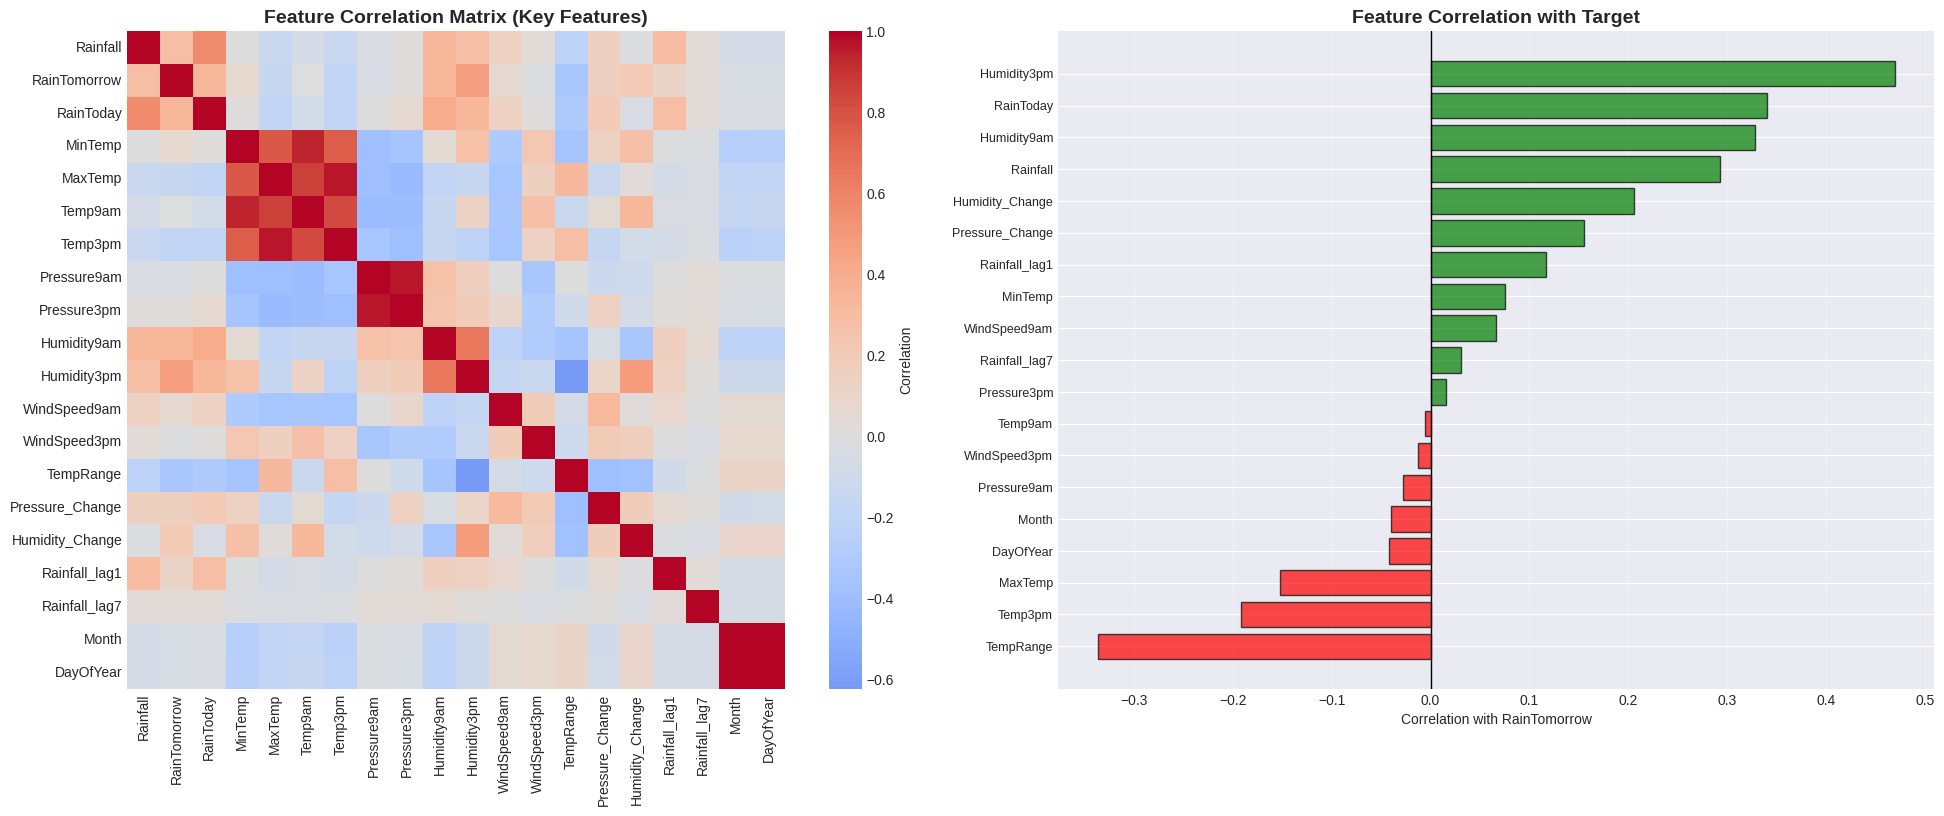


 Saved: Sydney_week3_correlation_analysis.svg

 Top 5 Features Correlated with RainTomorrow:
   Humidity_Change          :  0.205
   Rainfall                 :  0.293
   Humidity9am              :  0.328
   RainToday                :  0.340
   Humidity3pm              :  0.469

 Top 5 Negatively Correlated Features:
   TempRange                : -0.336
   Temp3pm                  : -0.191
   MaxTemp                  : -0.153
   DayOfYear                : -0.042
   Month                    : -0.040


In [44]:
# Feature correlation analysis
print("="*80)
print("FEATURE CORRELATION ANALYSIS")
print("="*80)

# Select subset of key features for visualization (too many features for readable heatmap)
key_features_viz = [
    'Rainfall', 'RainTomorrow', 'RainToday',
    'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
    'Pressure9am', 'Pressure3pm',
    'Humidity9am', 'Humidity3pm',
    'WindSpeed9am', 'WindSpeed3pm',
    'TempRange', 'Pressure_Change', 'Humidity_Change',
    'Rainfall_lag1', 'Rainfall_lag7',
    'Month', 'DayOfYear'
]

# Compute correlation matrix
correlation_matrix = df_processed[key_features_viz].corr()

# Create heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Full correlation heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Feature Correlation Matrix (Key Features)', fontsize=14, fontweight='bold')

# Correlation with target (RainTomorrow)
target_corr = correlation_matrix['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=True)

colors_corr = ['red' if x < 0 else 'green' for x in target_corr.values]
axes[1].barh(range(len(target_corr)), target_corr.values, color=colors_corr, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index, fontsize=9)
axes[1].set_xlabel('Correlation with RainTomorrow')
axes[1].set_title('Feature Correlation with Target', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f'{CITY}_week3_correlation_analysis.svg', format='svg', bbox_inches='tight')
plt.savefig(f'{CITY}_week3_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Saved: {CITY}_week3_correlation_analysis.svg")

print(f"\n Top 5 Features Correlated with RainTomorrow:")
for feat, corr in target_corr.tail(5).items():
    print(f"   {feat:25s}: {corr:6.3f}")

print(f"\n Top 5 Negatively Correlated Features:")
for feat, corr in target_corr.head(5).items():
    print(f"   {feat:25s}: {corr:6.3f}")